In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

from scipy import stats
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_insurance = pd.read_csv("insurance.csv")

In [3]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


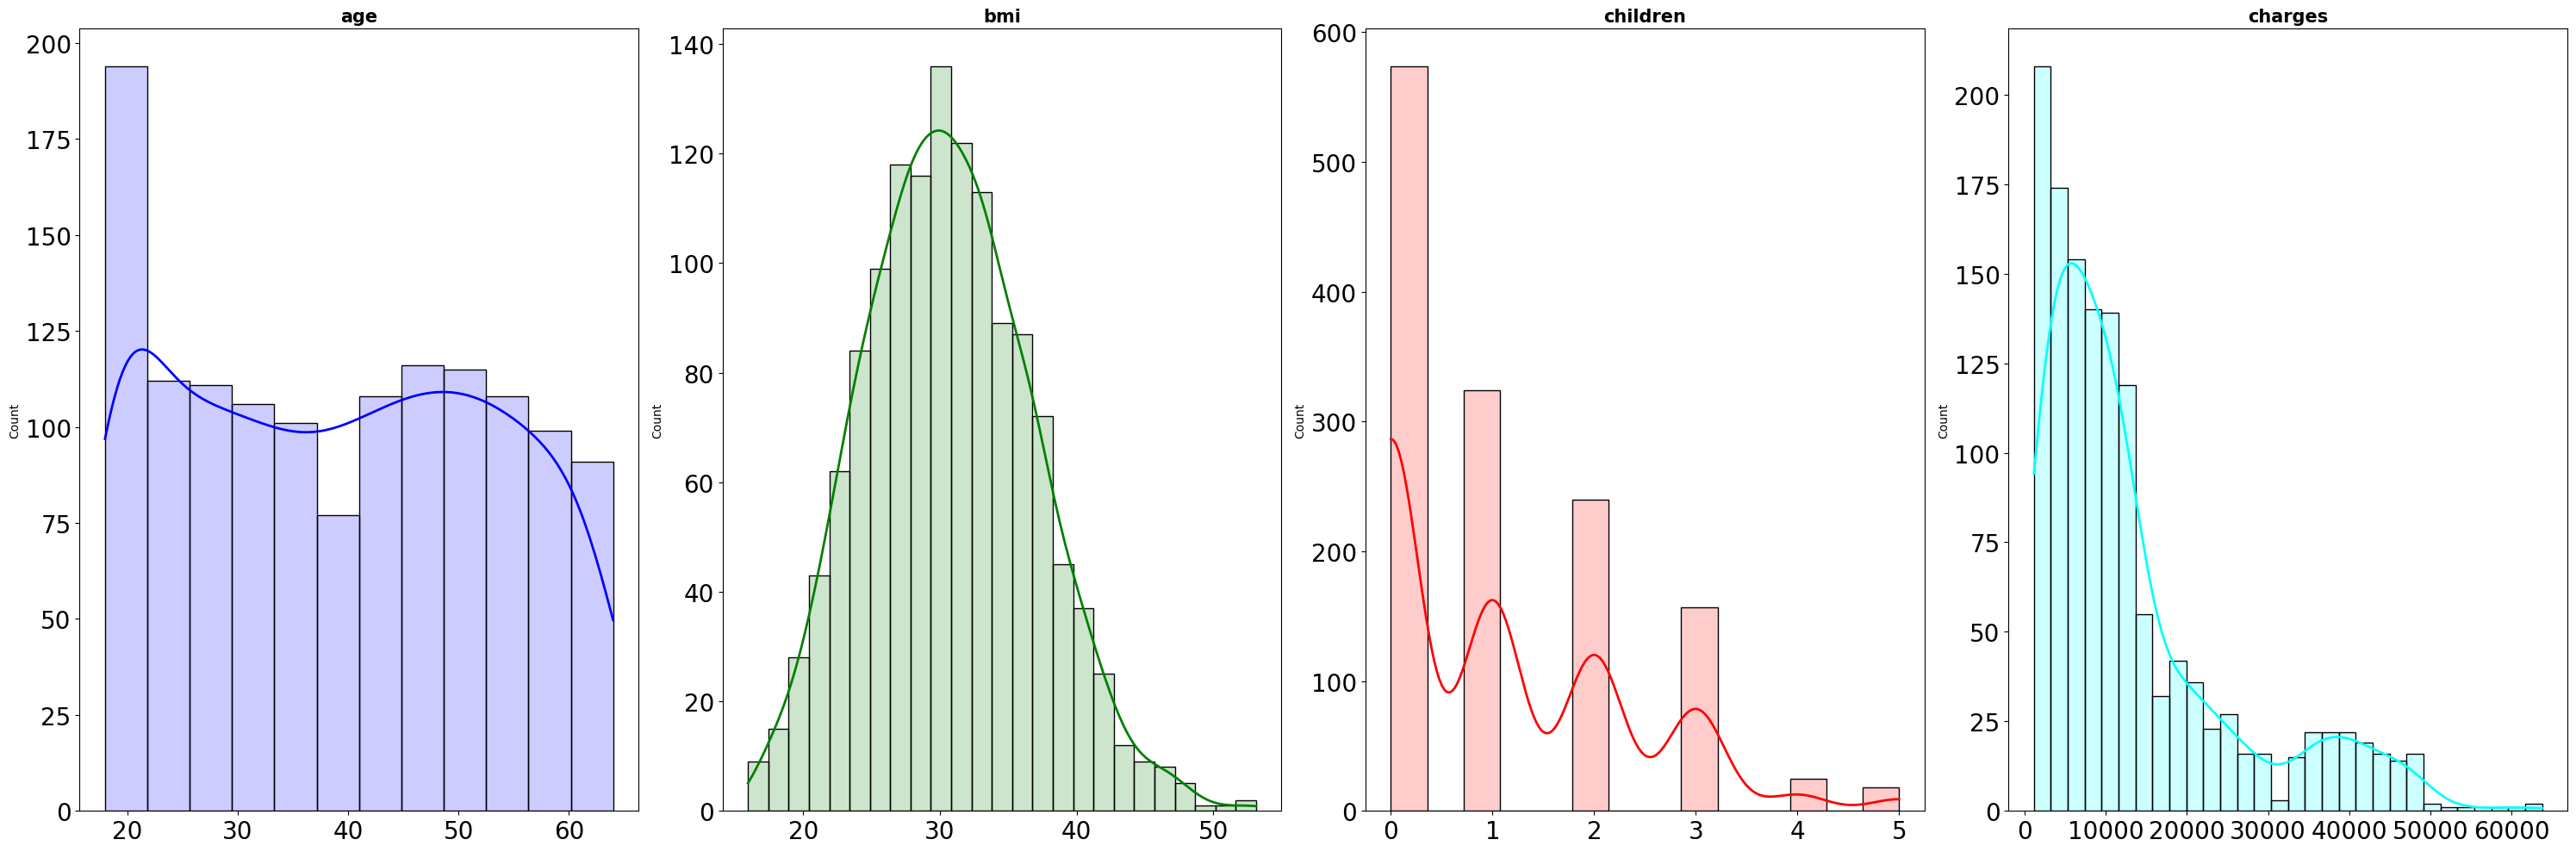

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_insurance,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

In [5]:
df_insurance_smoker = df_insurance[df_insurance['smoker'] == "yes"]
df_insurance_non_smoker = df_insurance[df_insurance['smoker'] == "no"]


In [6]:
df_insurance_smoker_high = df_insurance_smoker[df_insurance['bmi']>= 30]
df_insurance_smoker_low = df_insurance_smoker[df_insurance['bmi']< 30]
df_insurance_non_smoker_high = df_insurance_non_smoker[df_insurance['bmi']>= 30]
df_insurance_non_smoker_low = df_insurance_non_smoker[df_insurance['bmi']< 30]

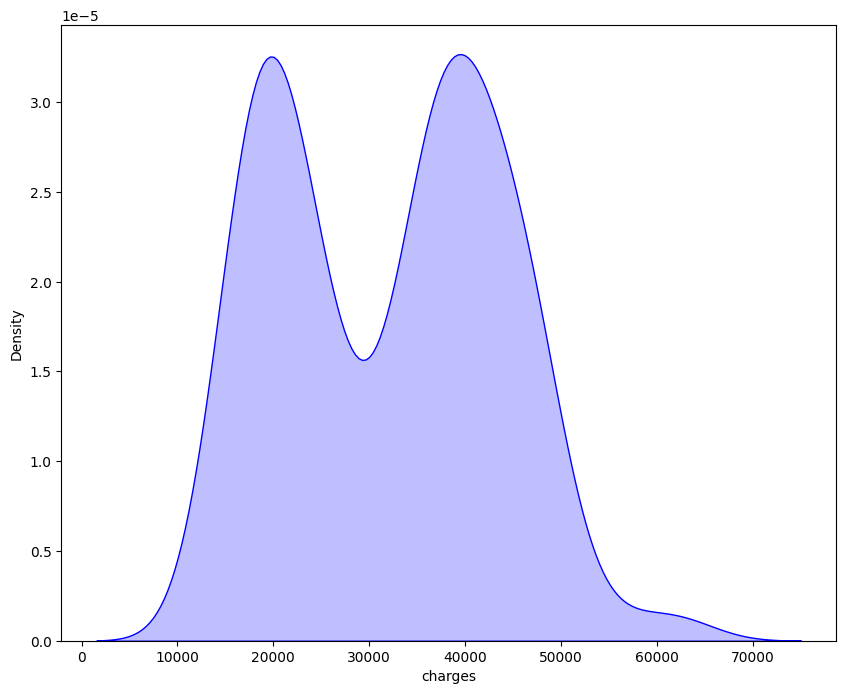

In [7]:
#Aqui vemos que hay dos grupos de coste bien diferenciados, esto se debe a los fumadores con bmi alto y fumadores con bmi bajo.
sns.distplot(
df_insurance_smoker.charges, 
hist = False, 
color = "blue", 
kde_kws = {"shade": True, "linewidth": 1});

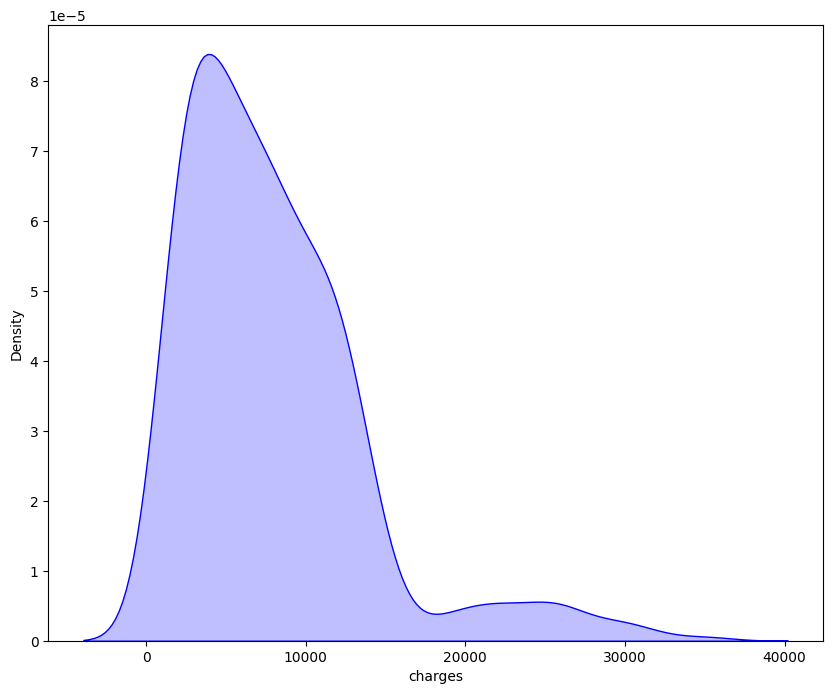

In [8]:
sns.distplot(
df_insurance_non_smoker_low.charges, 
hist = False, 
color = "blue", 
kde_kws = {"shade": True, "linewidth": 1});

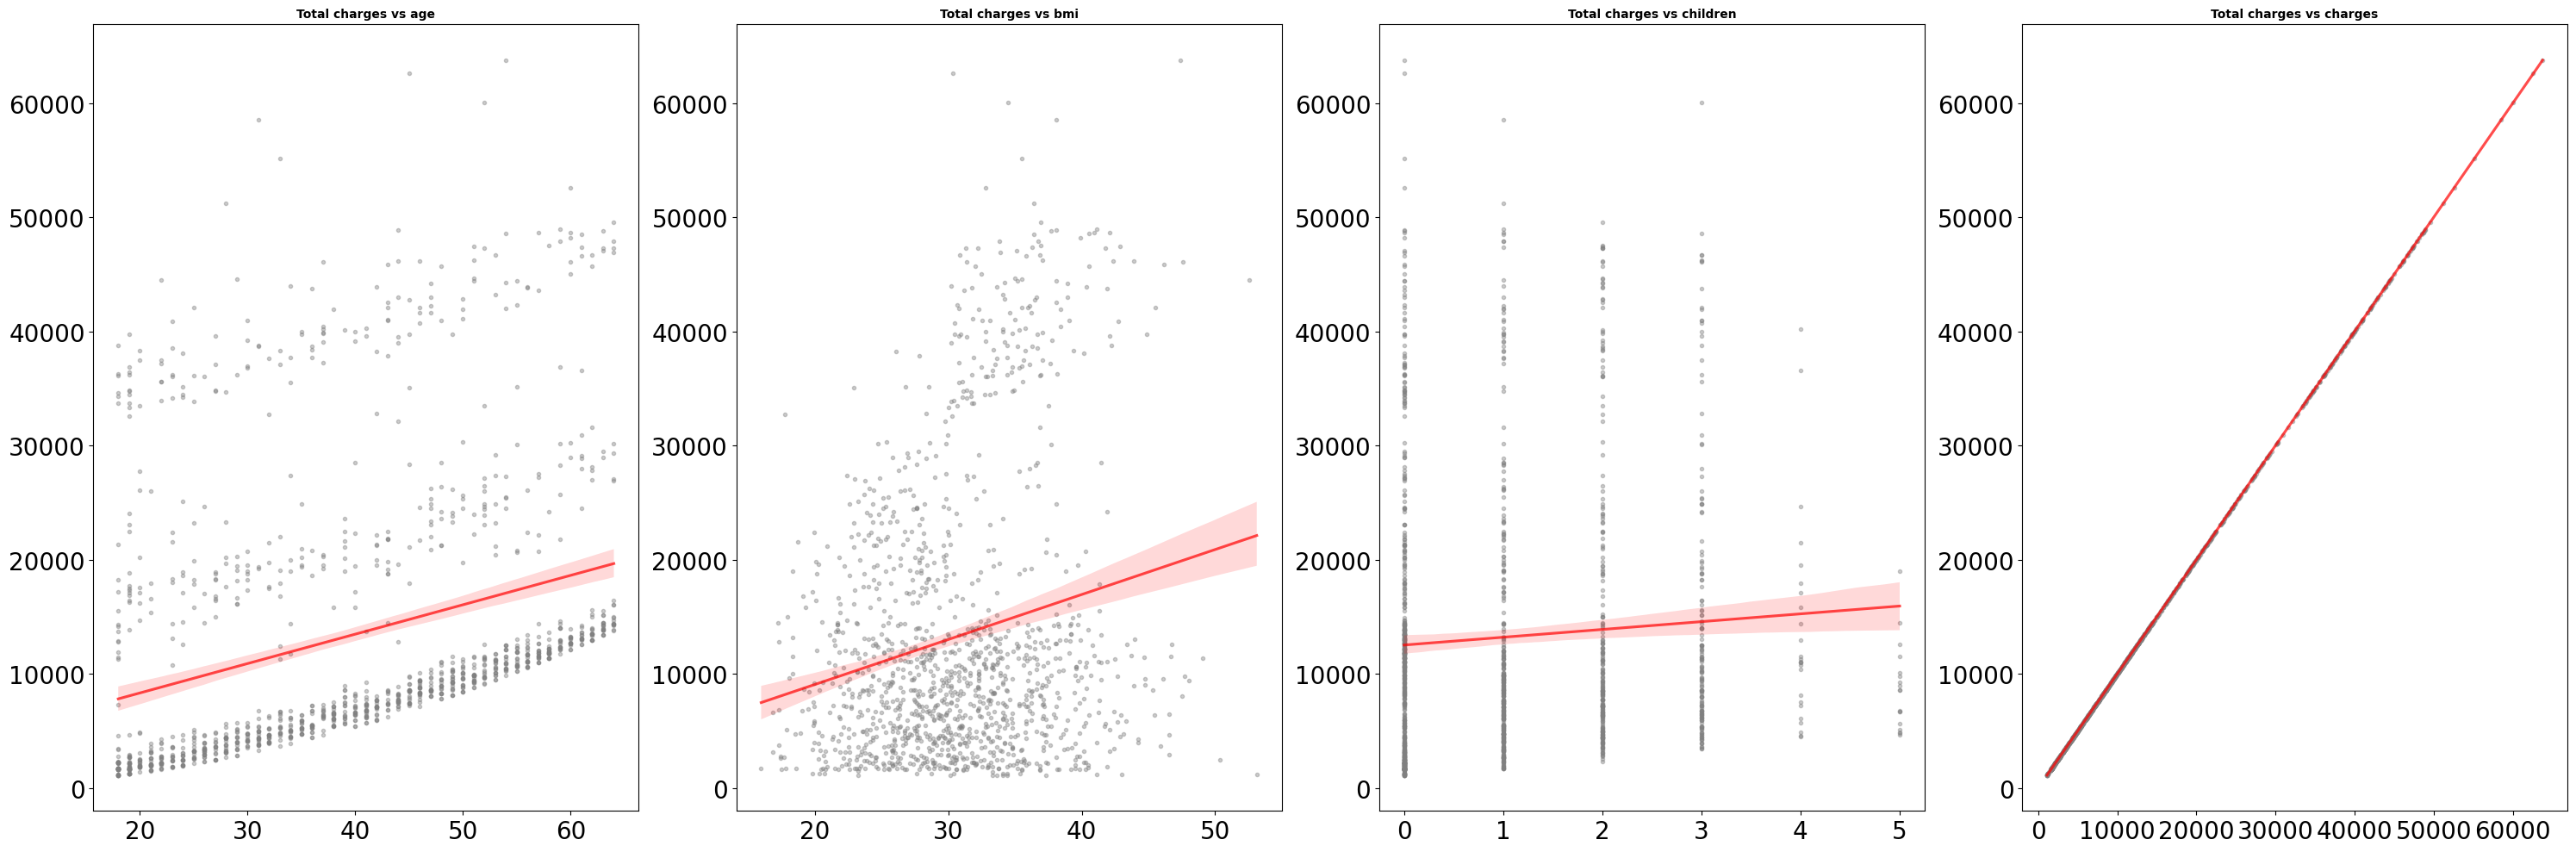

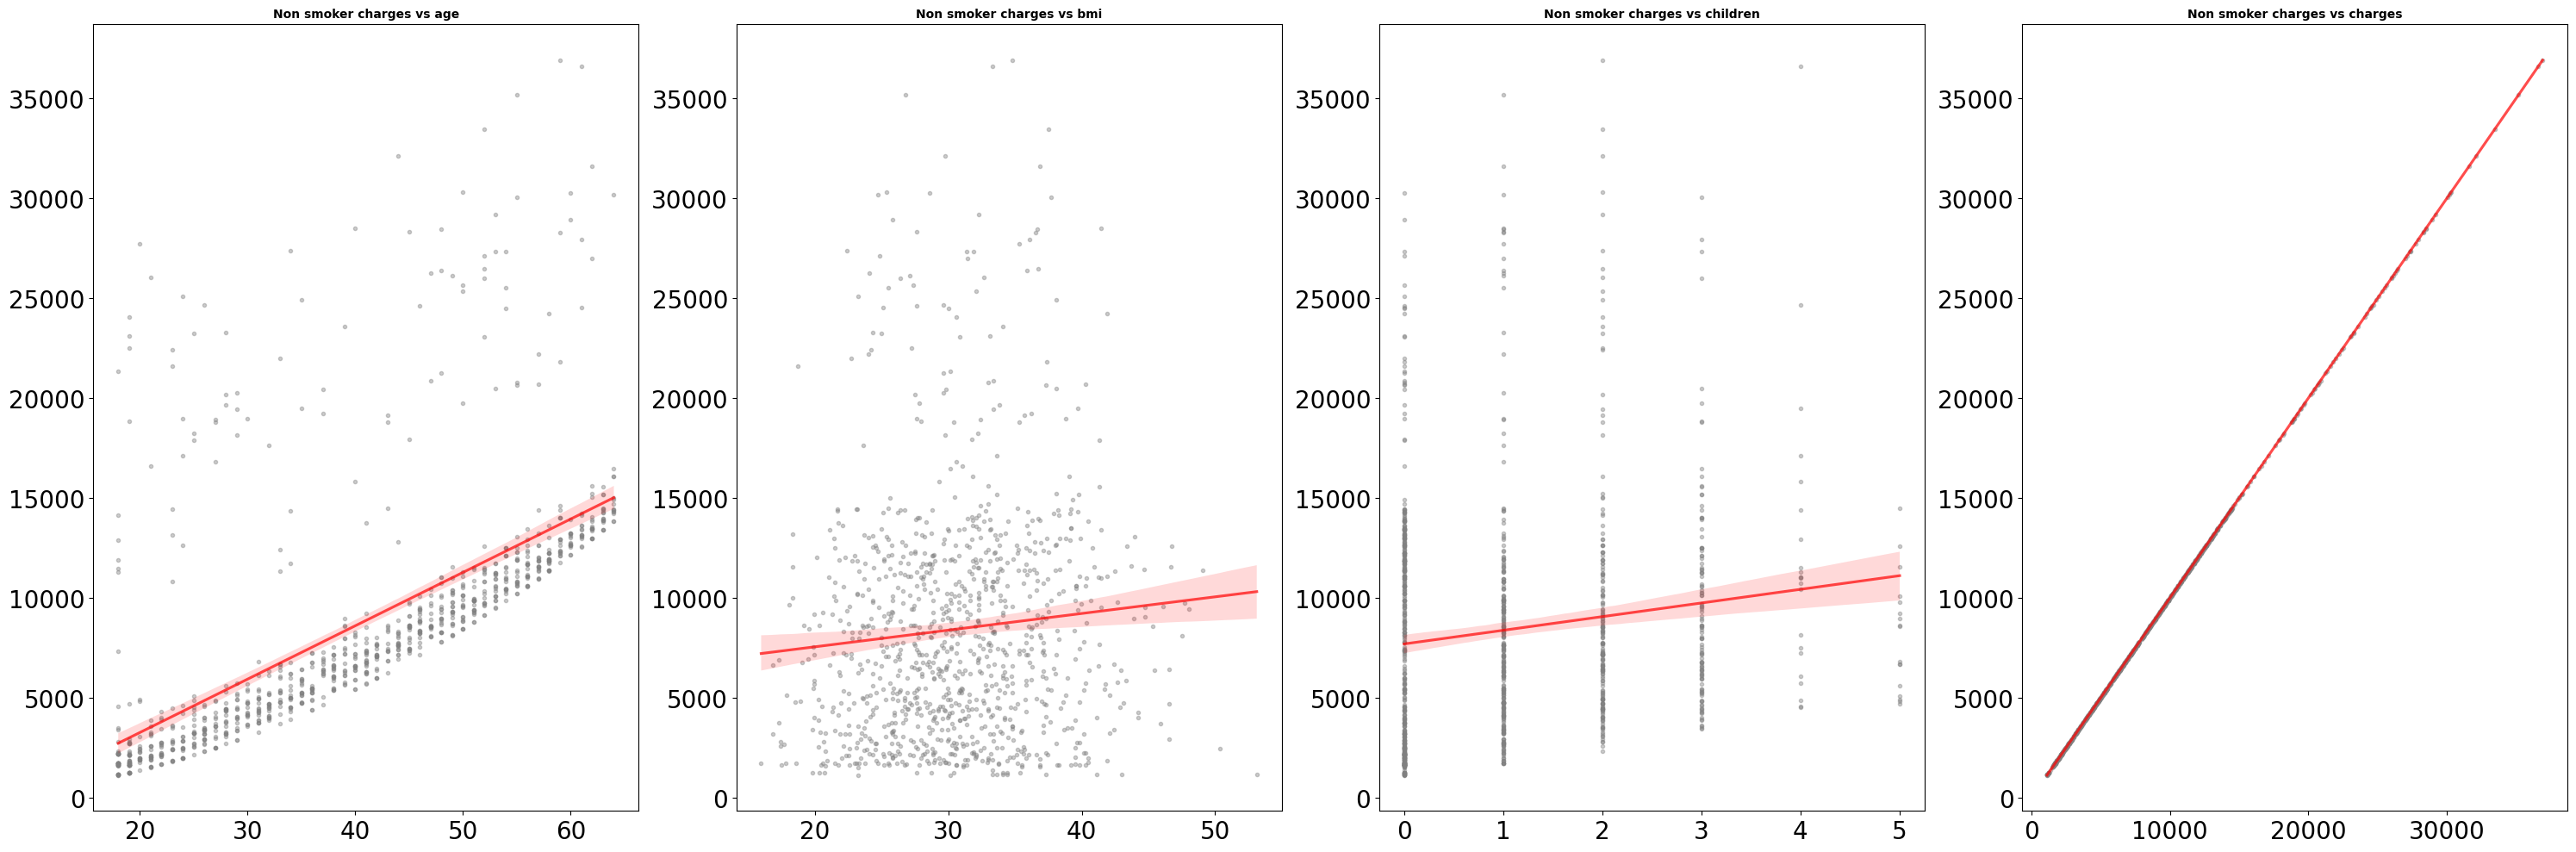

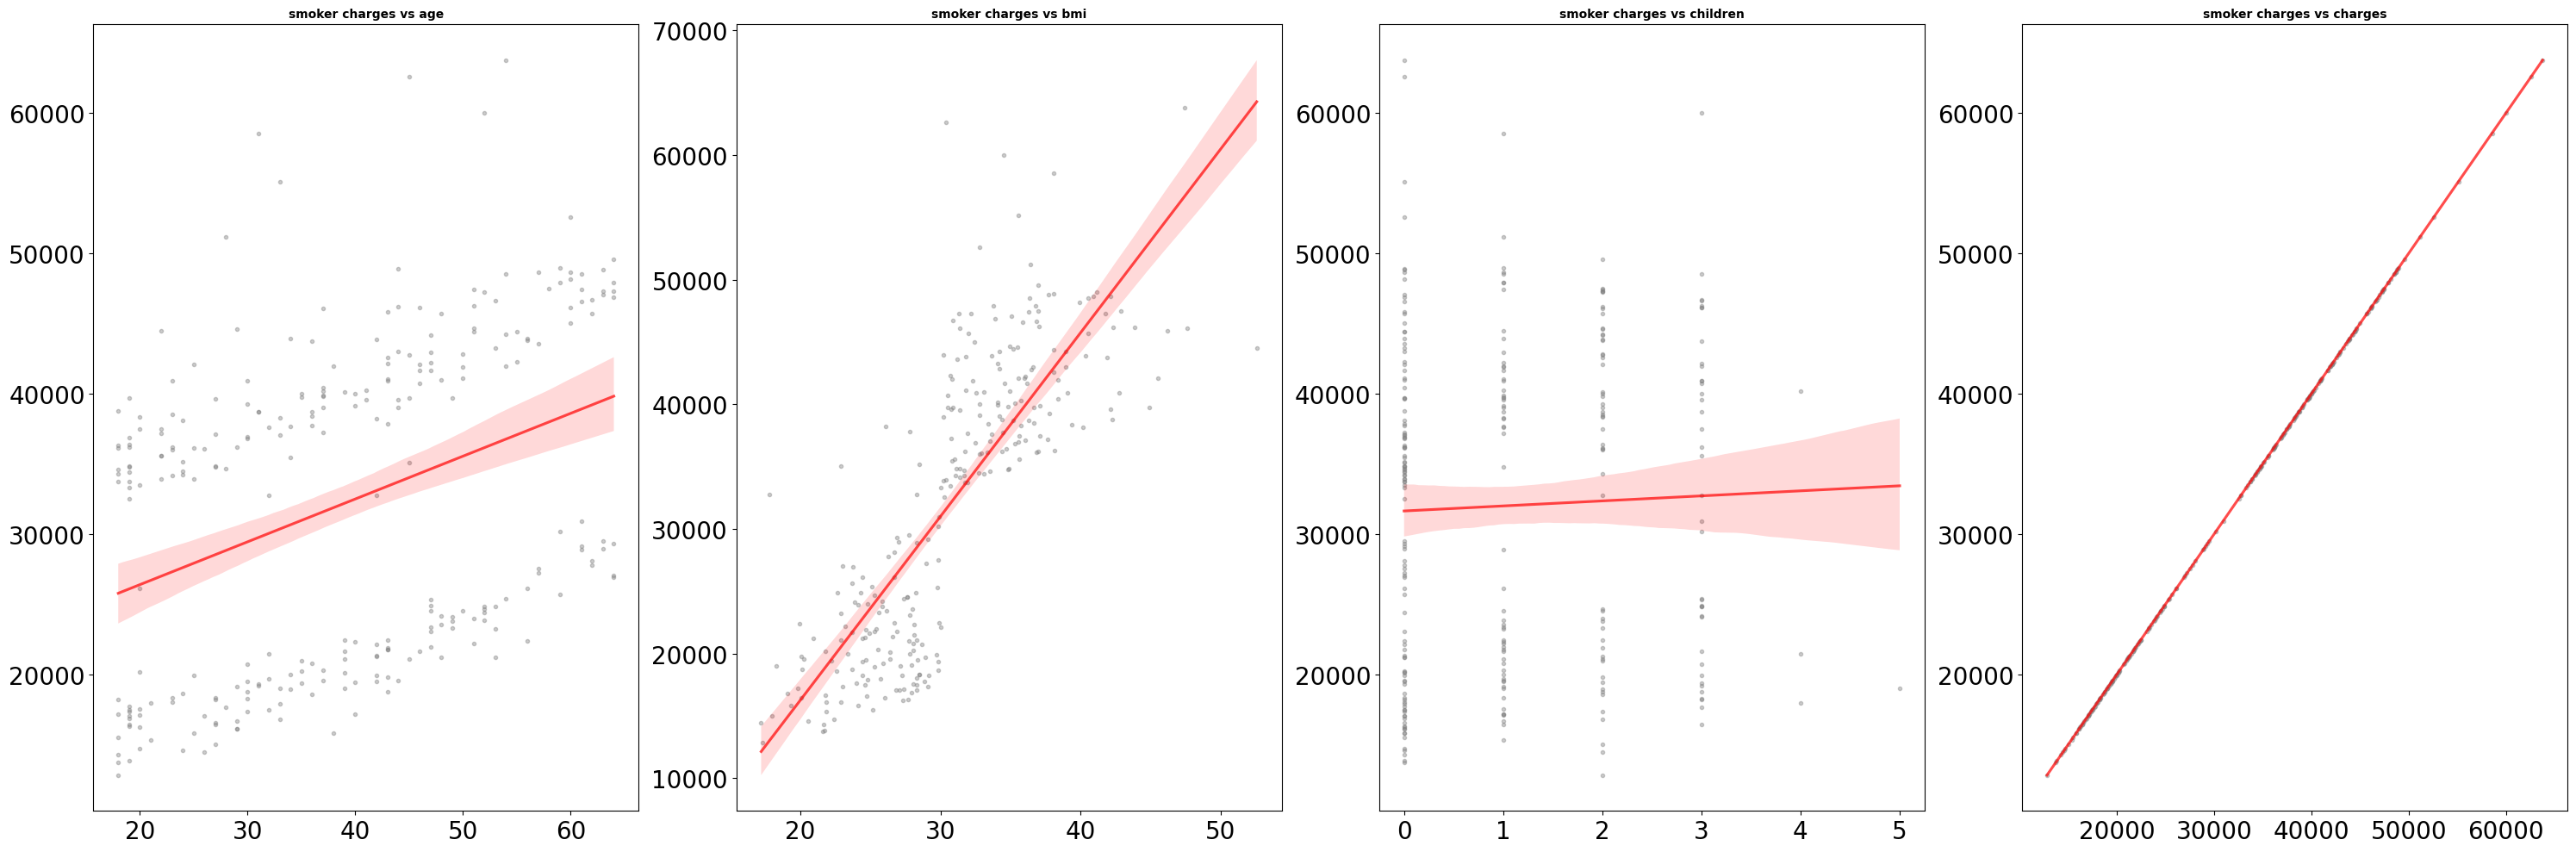

In [9]:
#Aqui observamos la comparación de lo que les cuestan en general todas las personas.
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_insurance[colum], 
        y = df_insurance["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Total charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

#Aqui observamos lo que les cuestan las personas no fumadoras.
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_non_smoker.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_insurance_non_smoker[colum], 
        y = df_insurance_non_smoker["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Non smoker charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.tight_layout();

#Aqui observamos lo que les cuestan las personas fumadoras.  
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_smoker.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_insurance_smoker[colum], 
        y = df_insurance_smoker["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"smoker charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

In [10]:
#Como podemos observar en las graficas de arriba parece haber dos grupos bien diferenciados entre los fumadores, esto se debe a que los fumadores con bmi alto o bmi bajo
#tienen costes muy diferentes, por lo que voy a representarlos por separado.

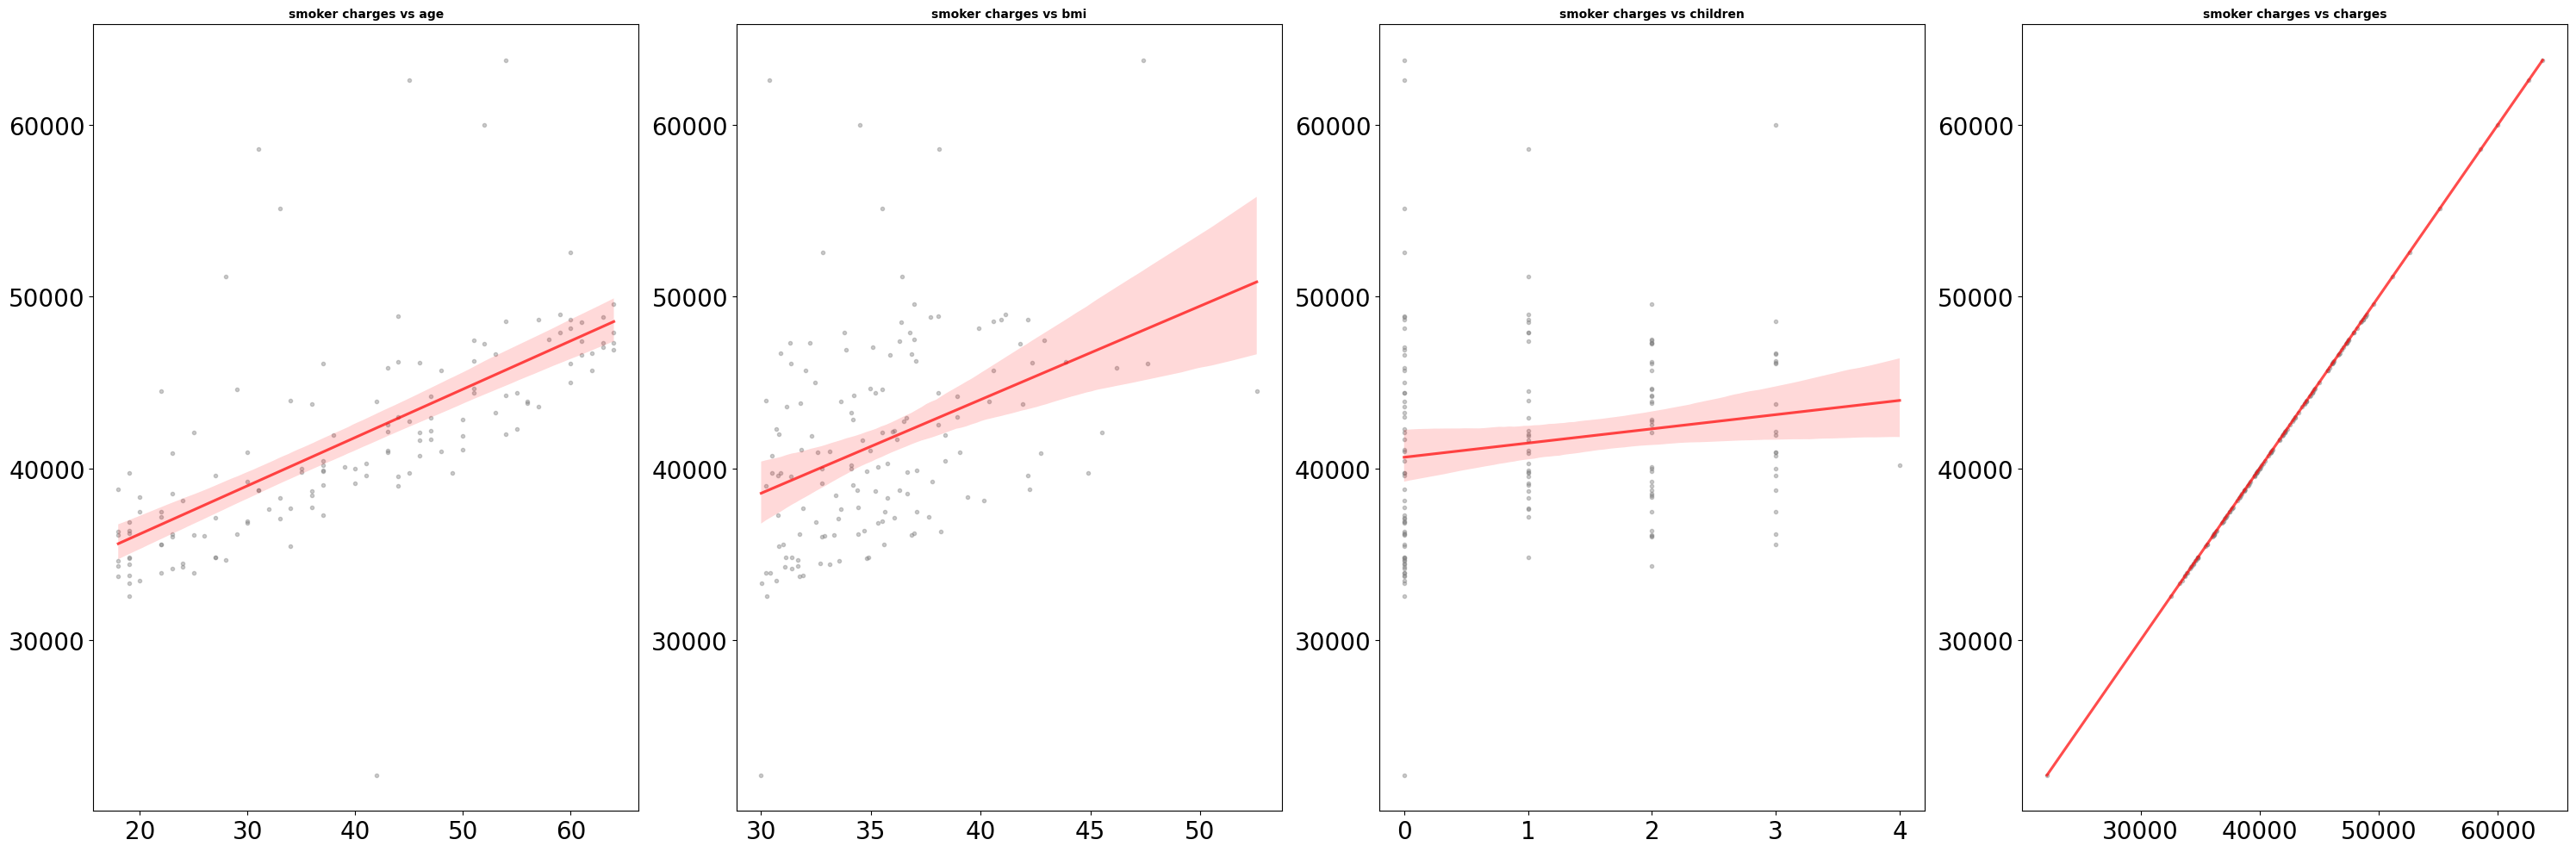

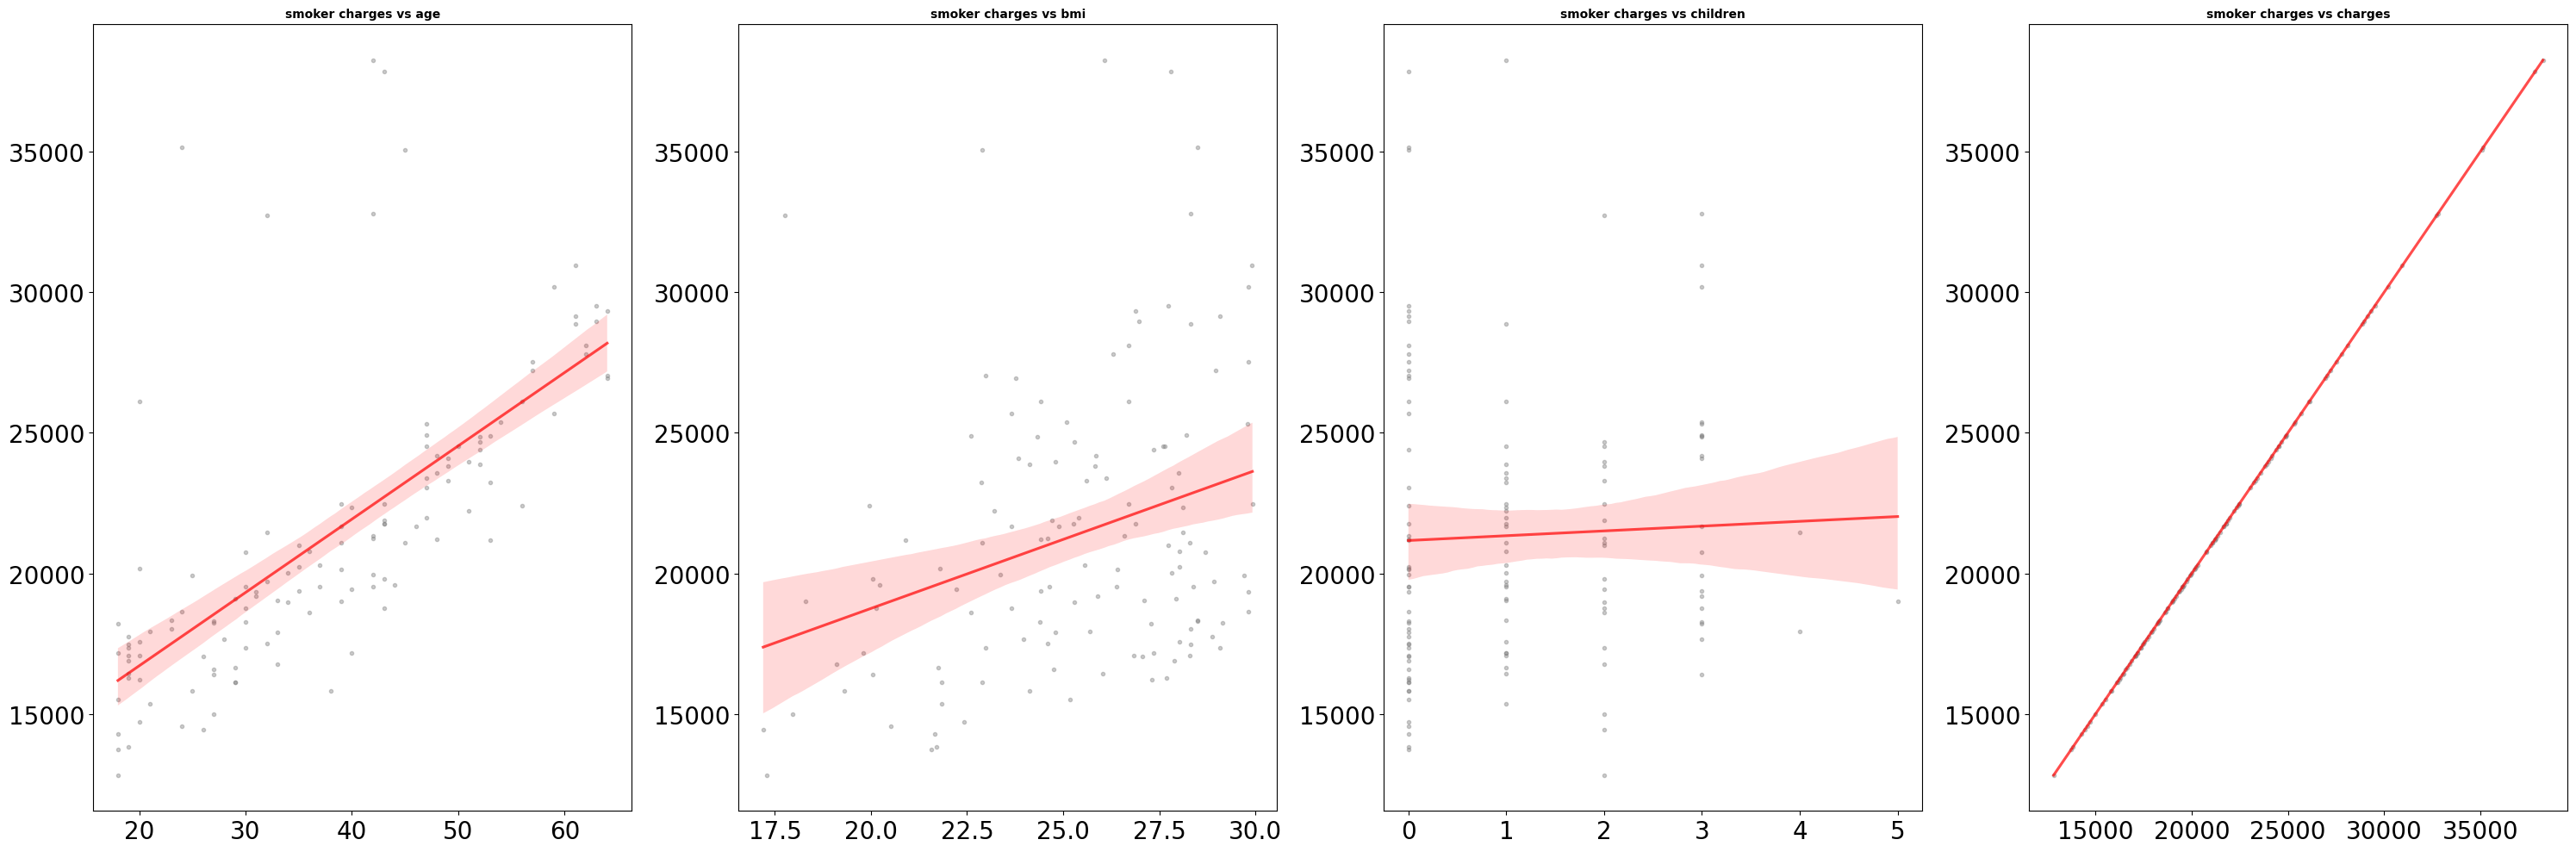

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_smoker_high.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_insurance_smoker_high[colum], 
        y = df_insurance_smoker_high["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"smoker charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_smoker_low.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_insurance_smoker_low[colum], 
        y = df_insurance_smoker_low["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"smoker charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

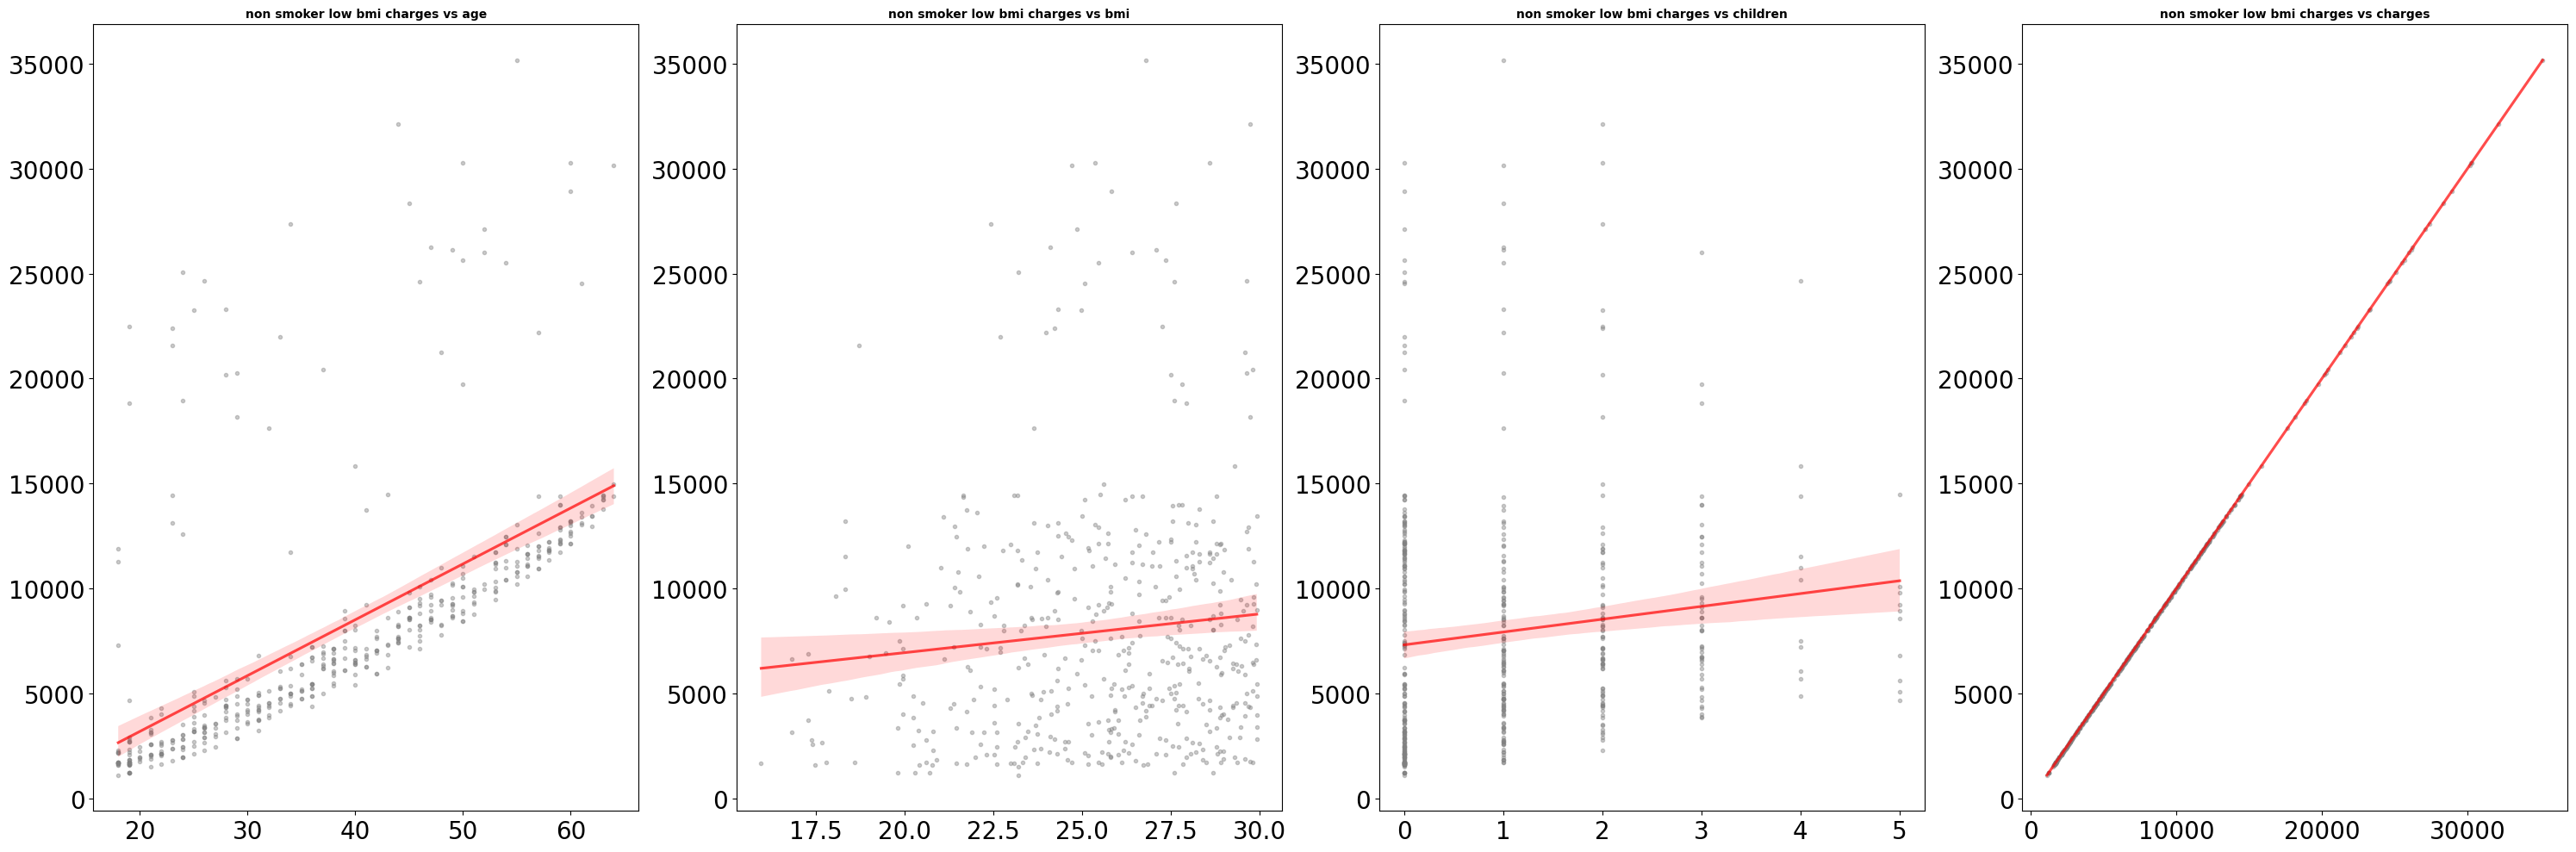

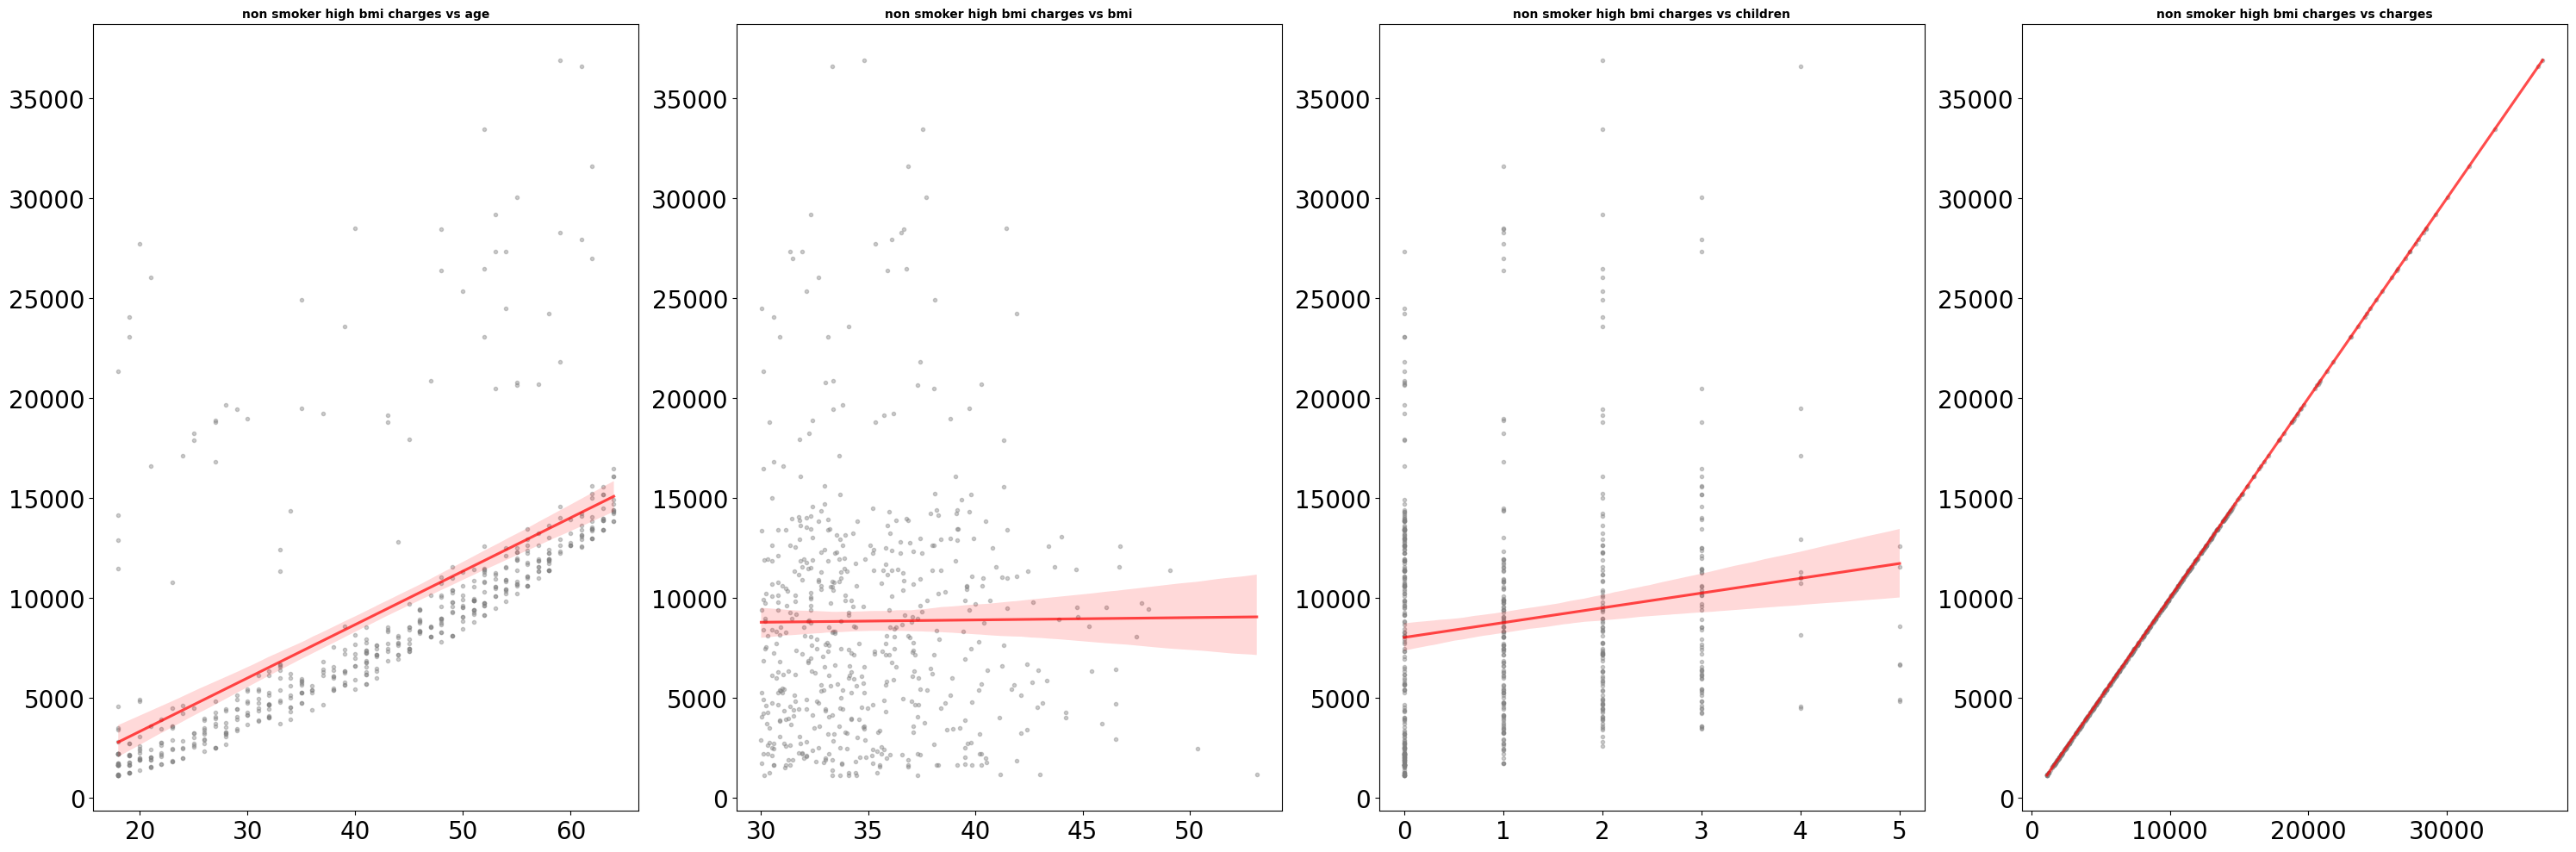

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_non_smoker_low.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_insurance_non_smoker_low[colum], 
        y = df_insurance_non_smoker_low["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"non smoker low bmi charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_non_smoker_high.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_insurance_non_smoker_high[colum], 
        y = df_insurance_non_smoker_high["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"non smoker high bmi charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

In [13]:
#Aqui tenemos por separado a los fumadores con bmi alto y bmi bajo, y podemos observar que los fumadores con bmi alto les cuestan mas del doble de dinero a la aseguradora.

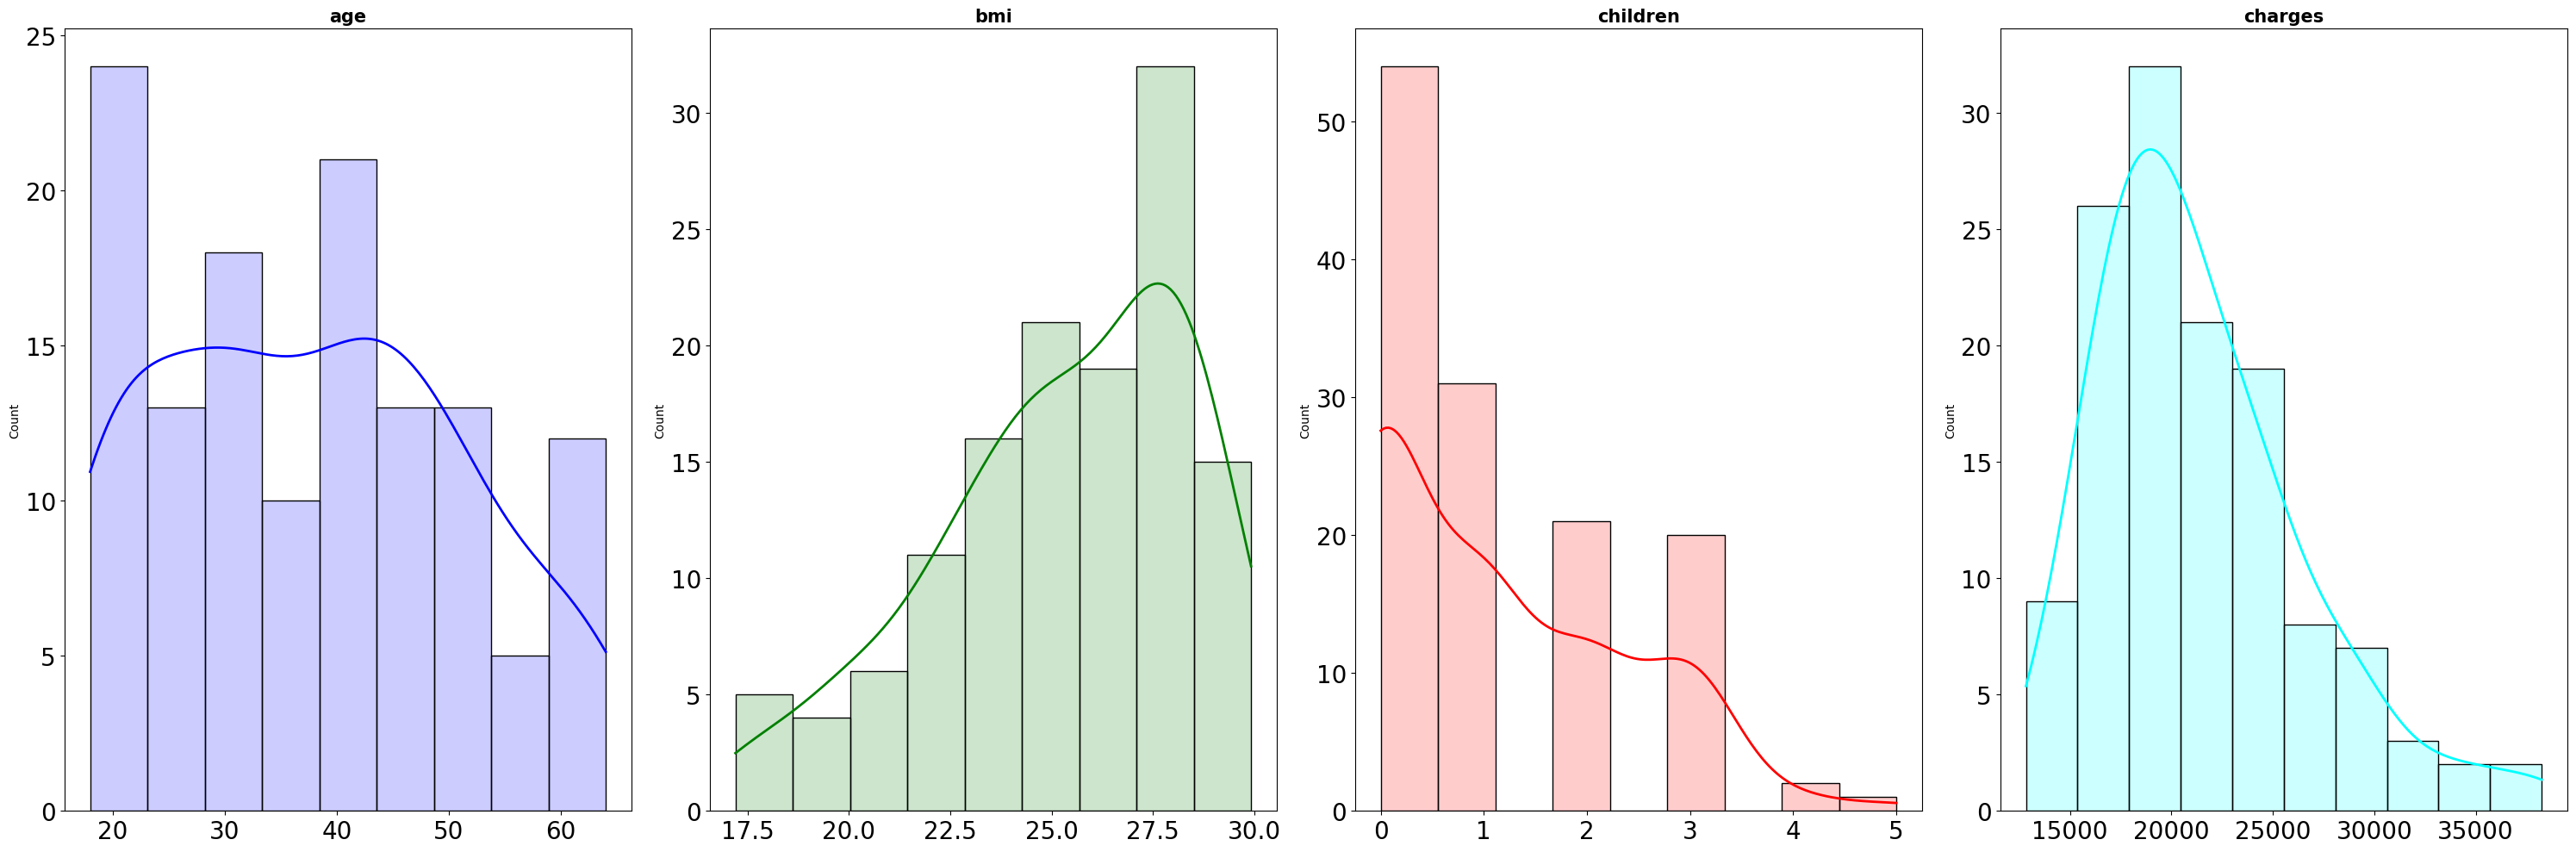

In [14]:
#Fumador con bmi bajo.
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_smoker_low.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_insurance_smoker_low,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

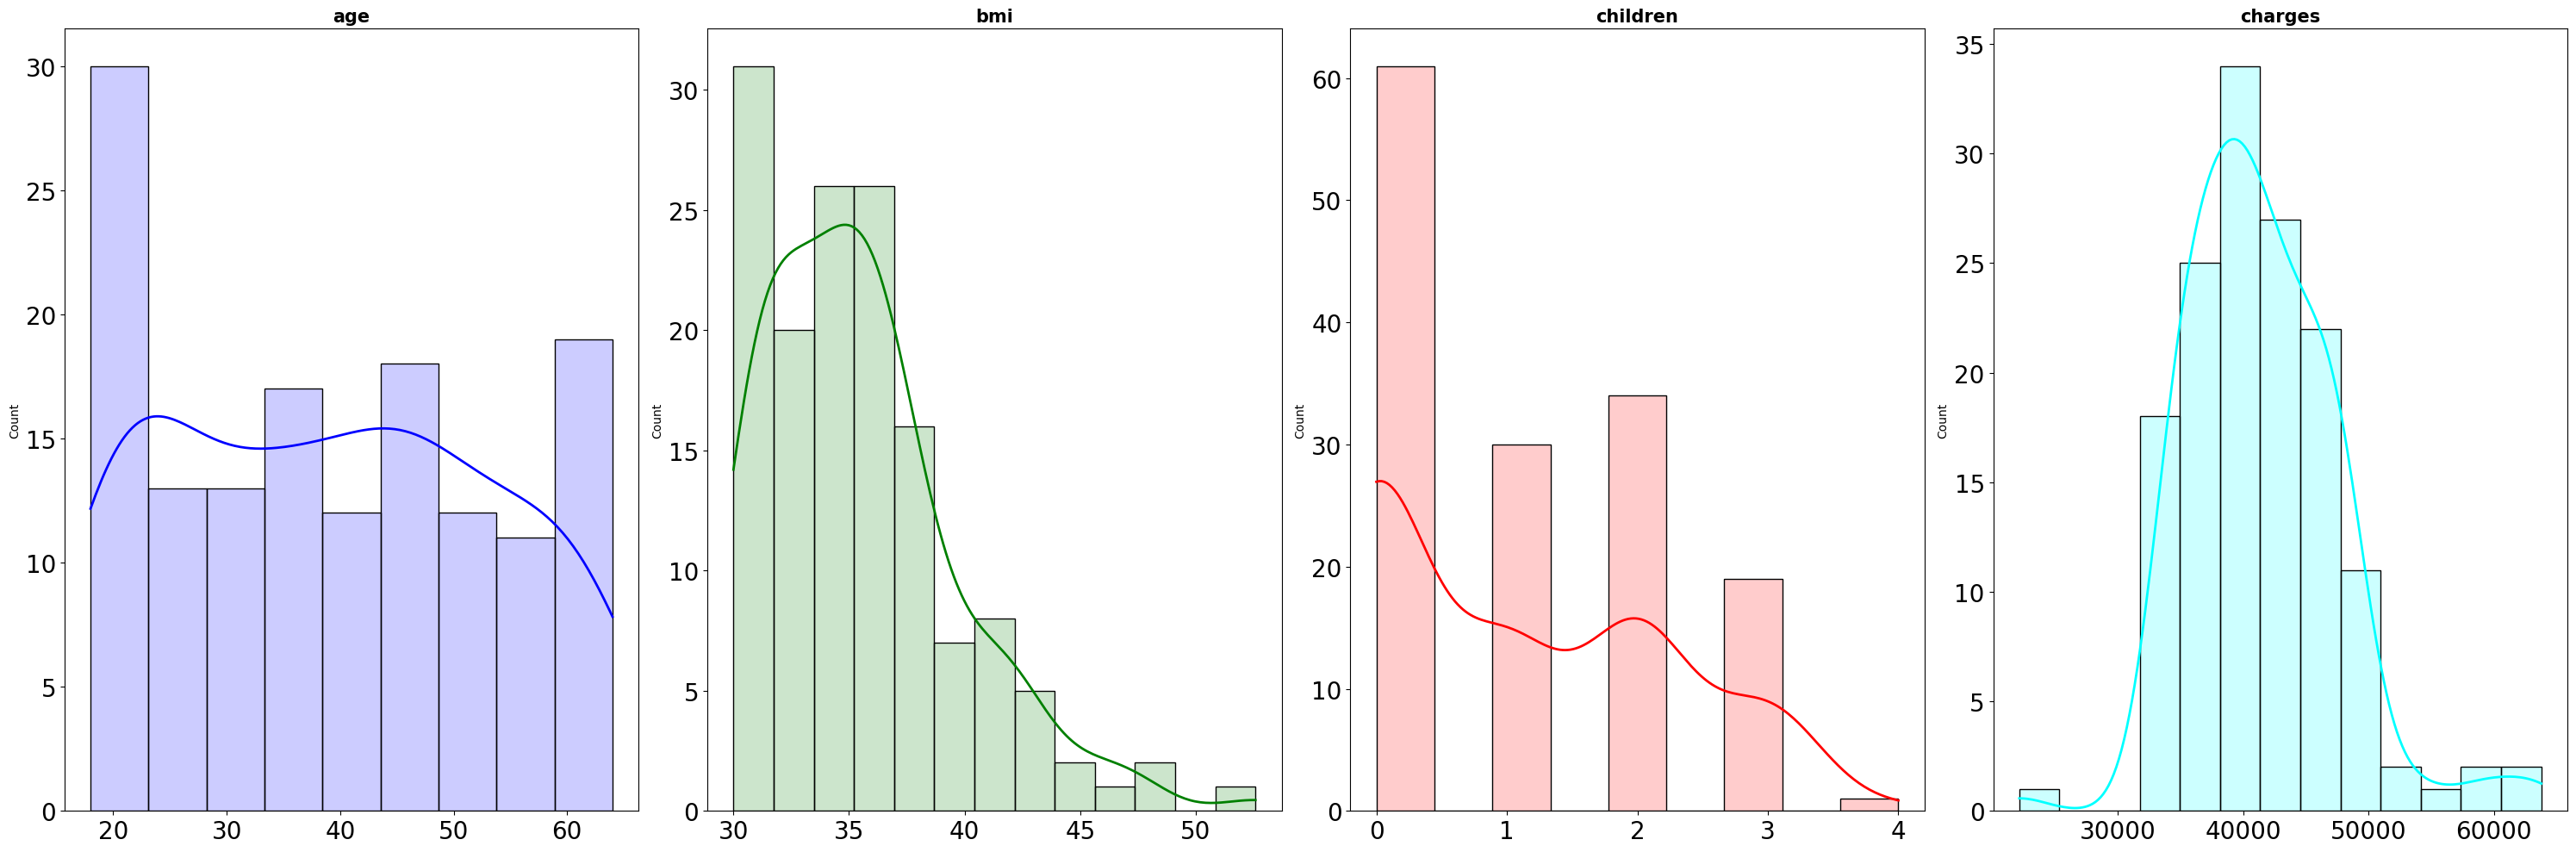

In [15]:
#Fumador con bmi alto.
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_smoker_high.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_insurance_smoker_high,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

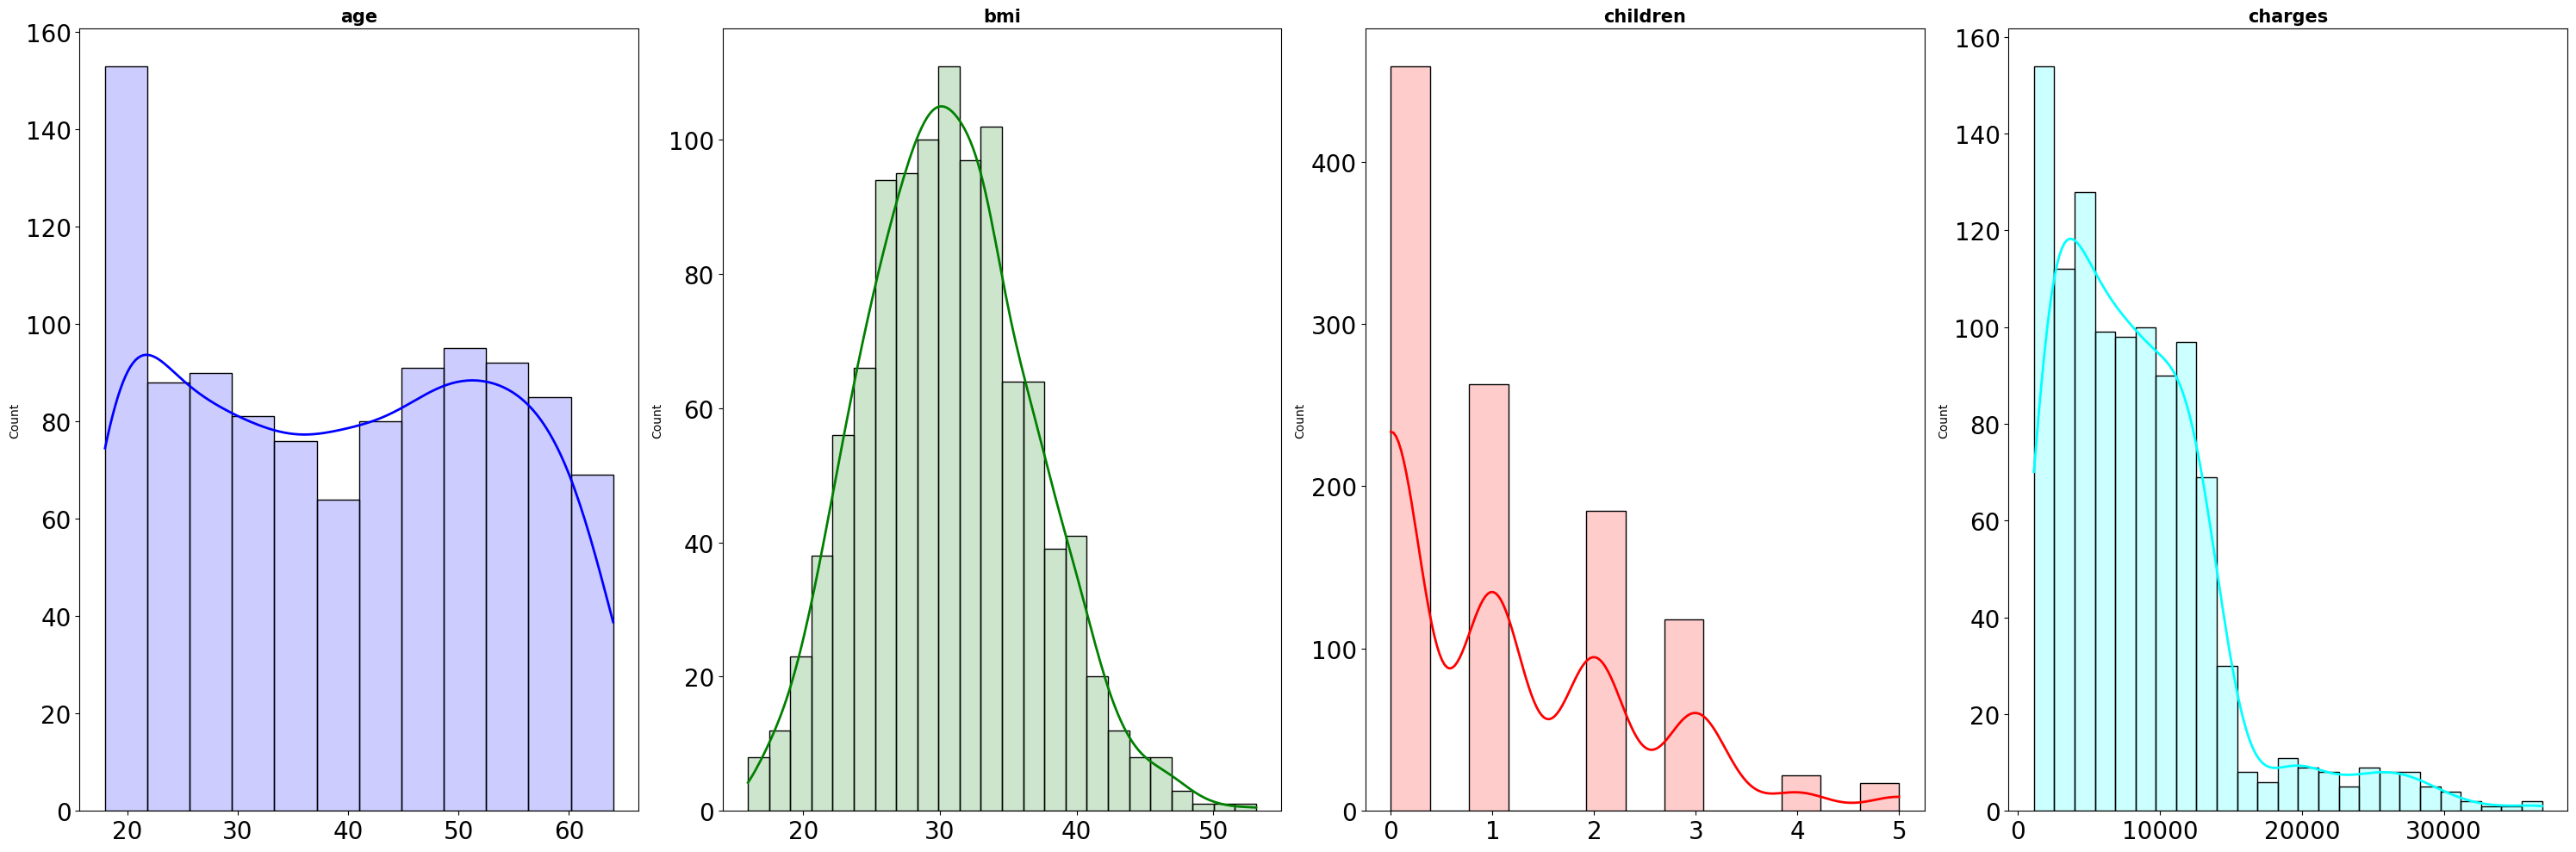

In [16]:
#No fumador.
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_insurance_non_smoker.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_insurance_non_smoker,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

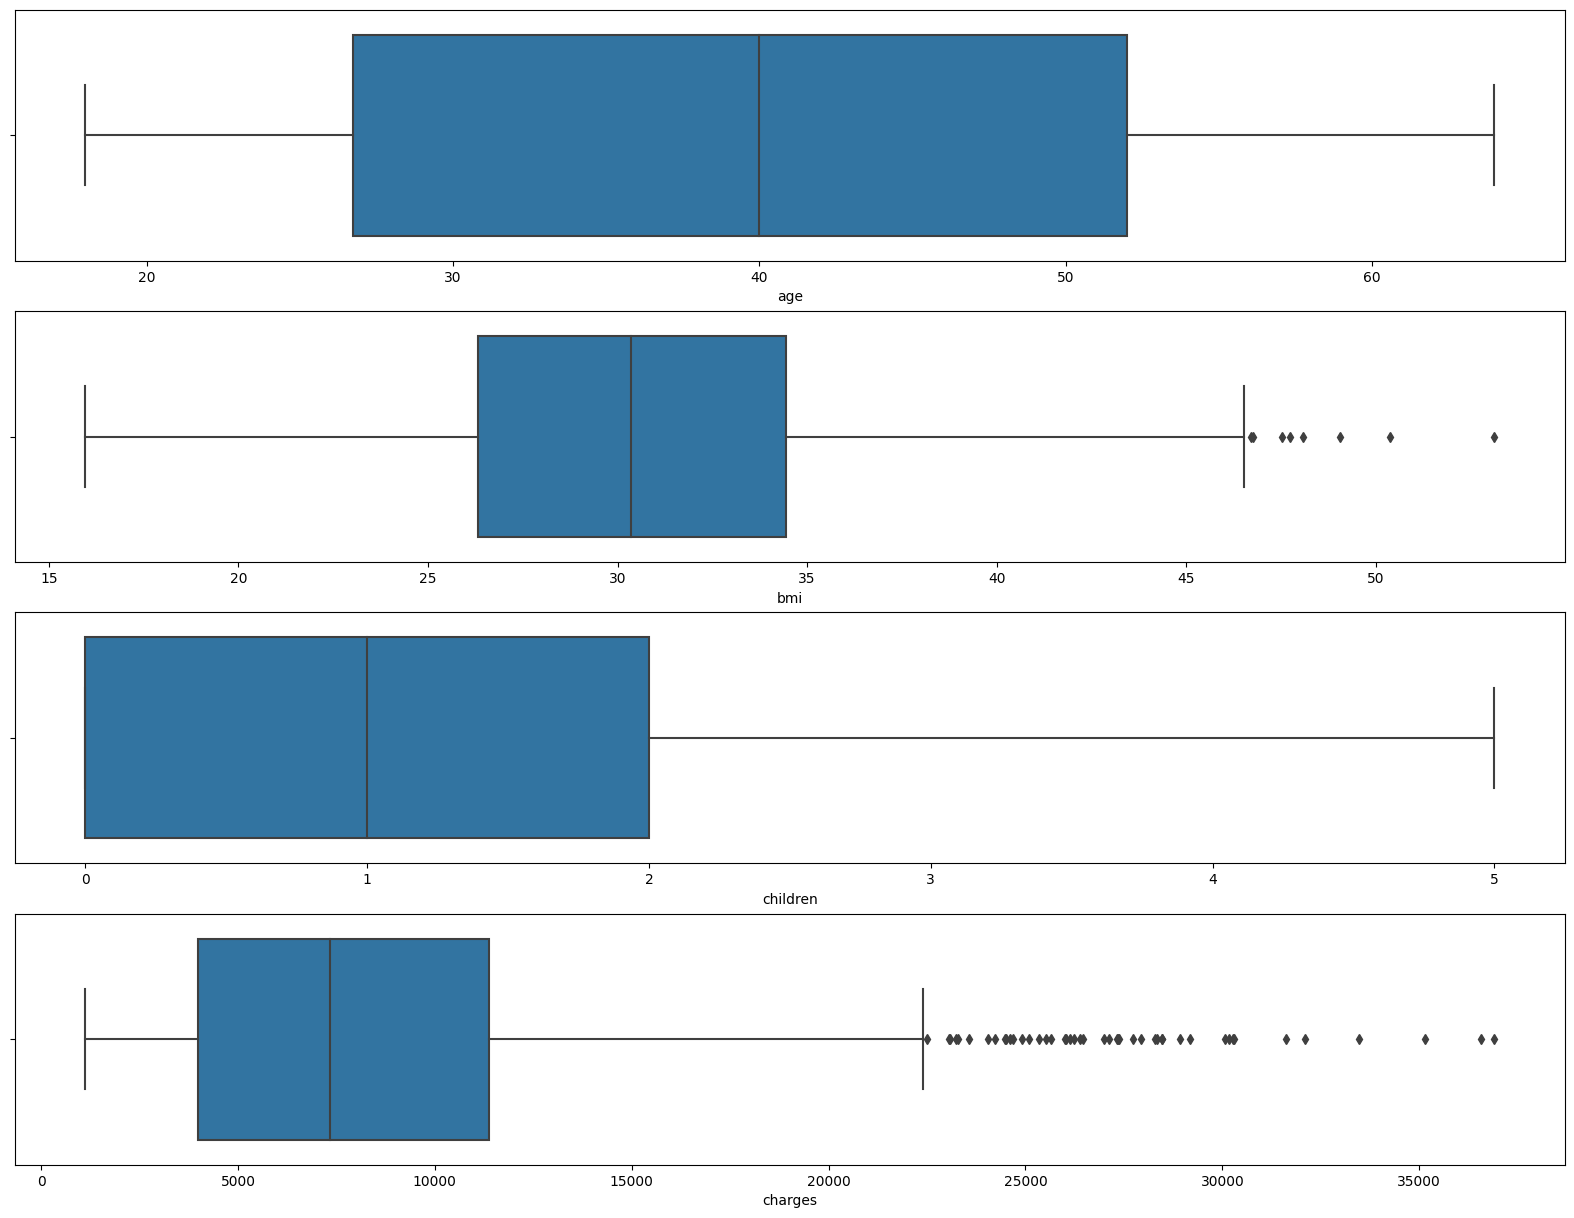

In [17]:
#Tratamiento de outliers.


#Boxplot con los no fumadores.
df_insurance_non_smoker_numericas = df_insurance_non_smoker.select_dtypes(include=np.number)
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_insurance_non_smoker_numericas.columns)):
    sns.boxplot(x=df_insurance_non_smoker_numericas.columns[i], data=df_insurance_non_smoker_numericas, ax=ax[i])
plt.show()


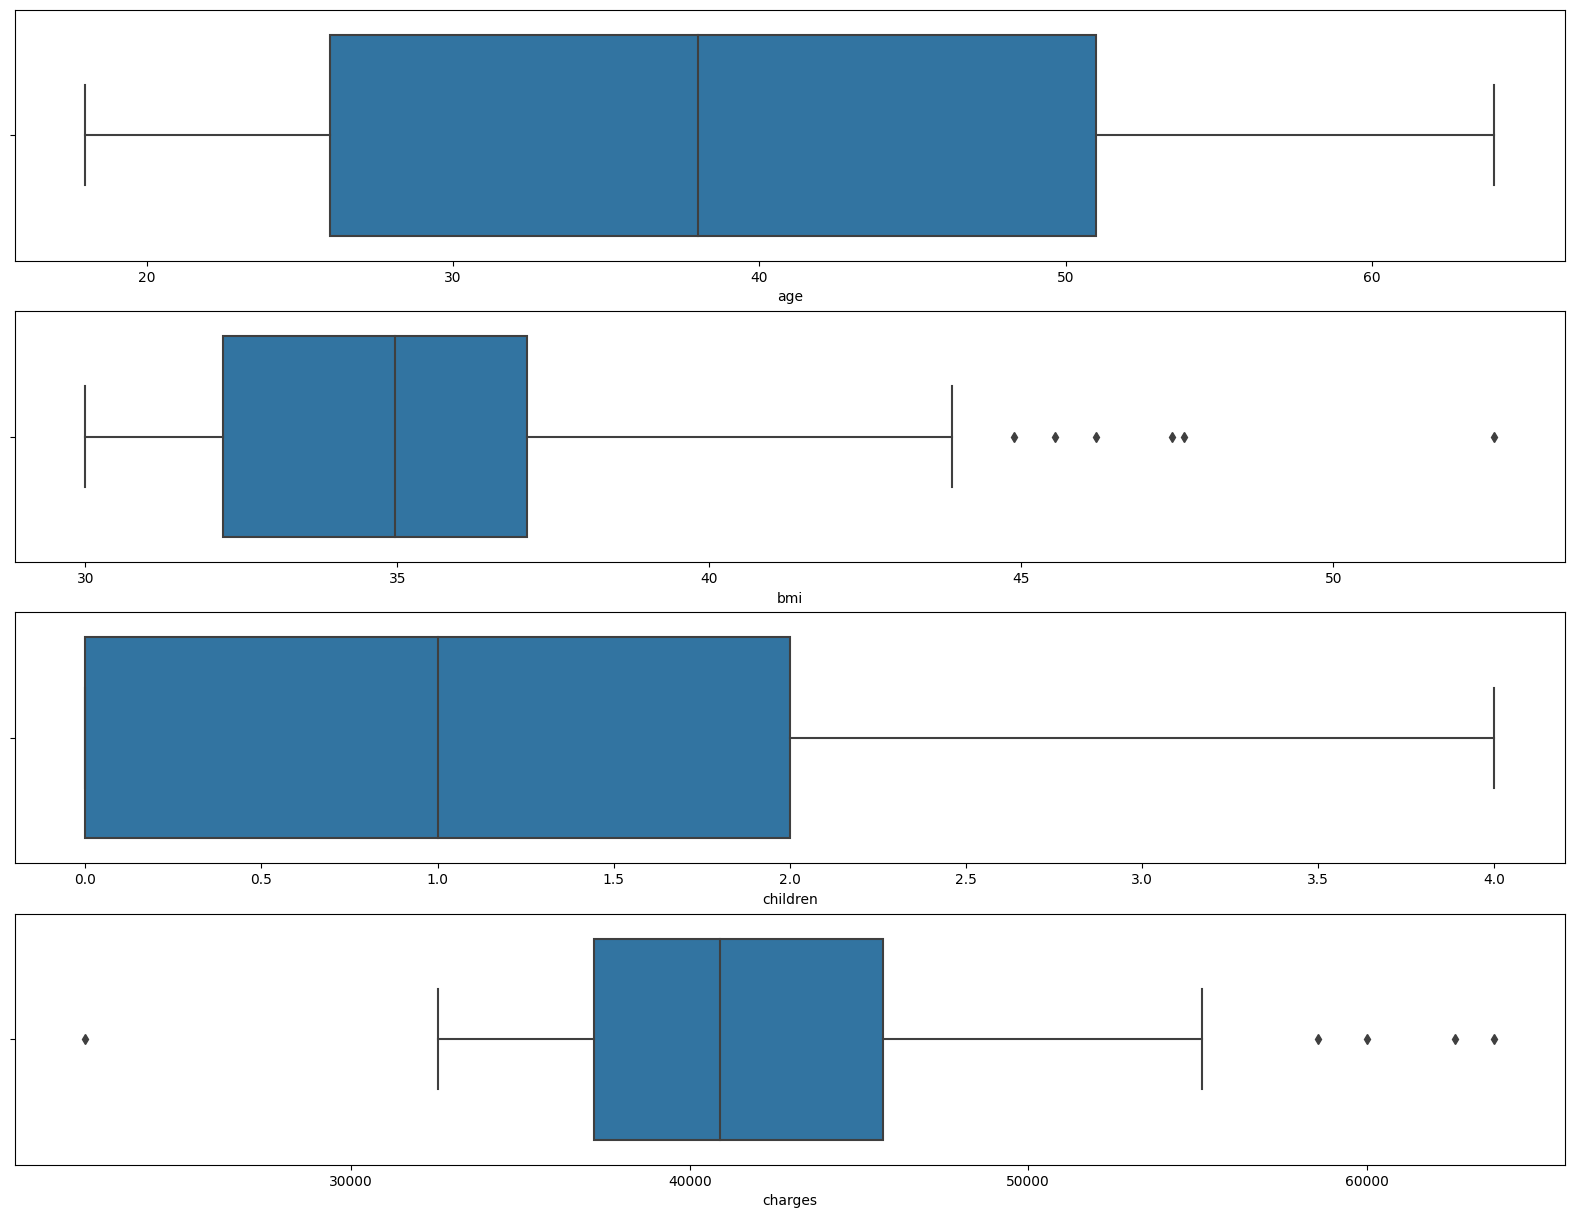

In [18]:
#Boxplot de los fumadores con bmi alto
df_insurance_smoker_high_numericas = df_insurance_smoker_high.select_dtypes(include=np.number)
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_insurance_smoker_high_numericas.columns)):
    sns.boxplot(x=df_insurance_smoker_high_numericas.columns[i], data=df_insurance_smoker_high_numericas, ax=ax[i])
plt.show()

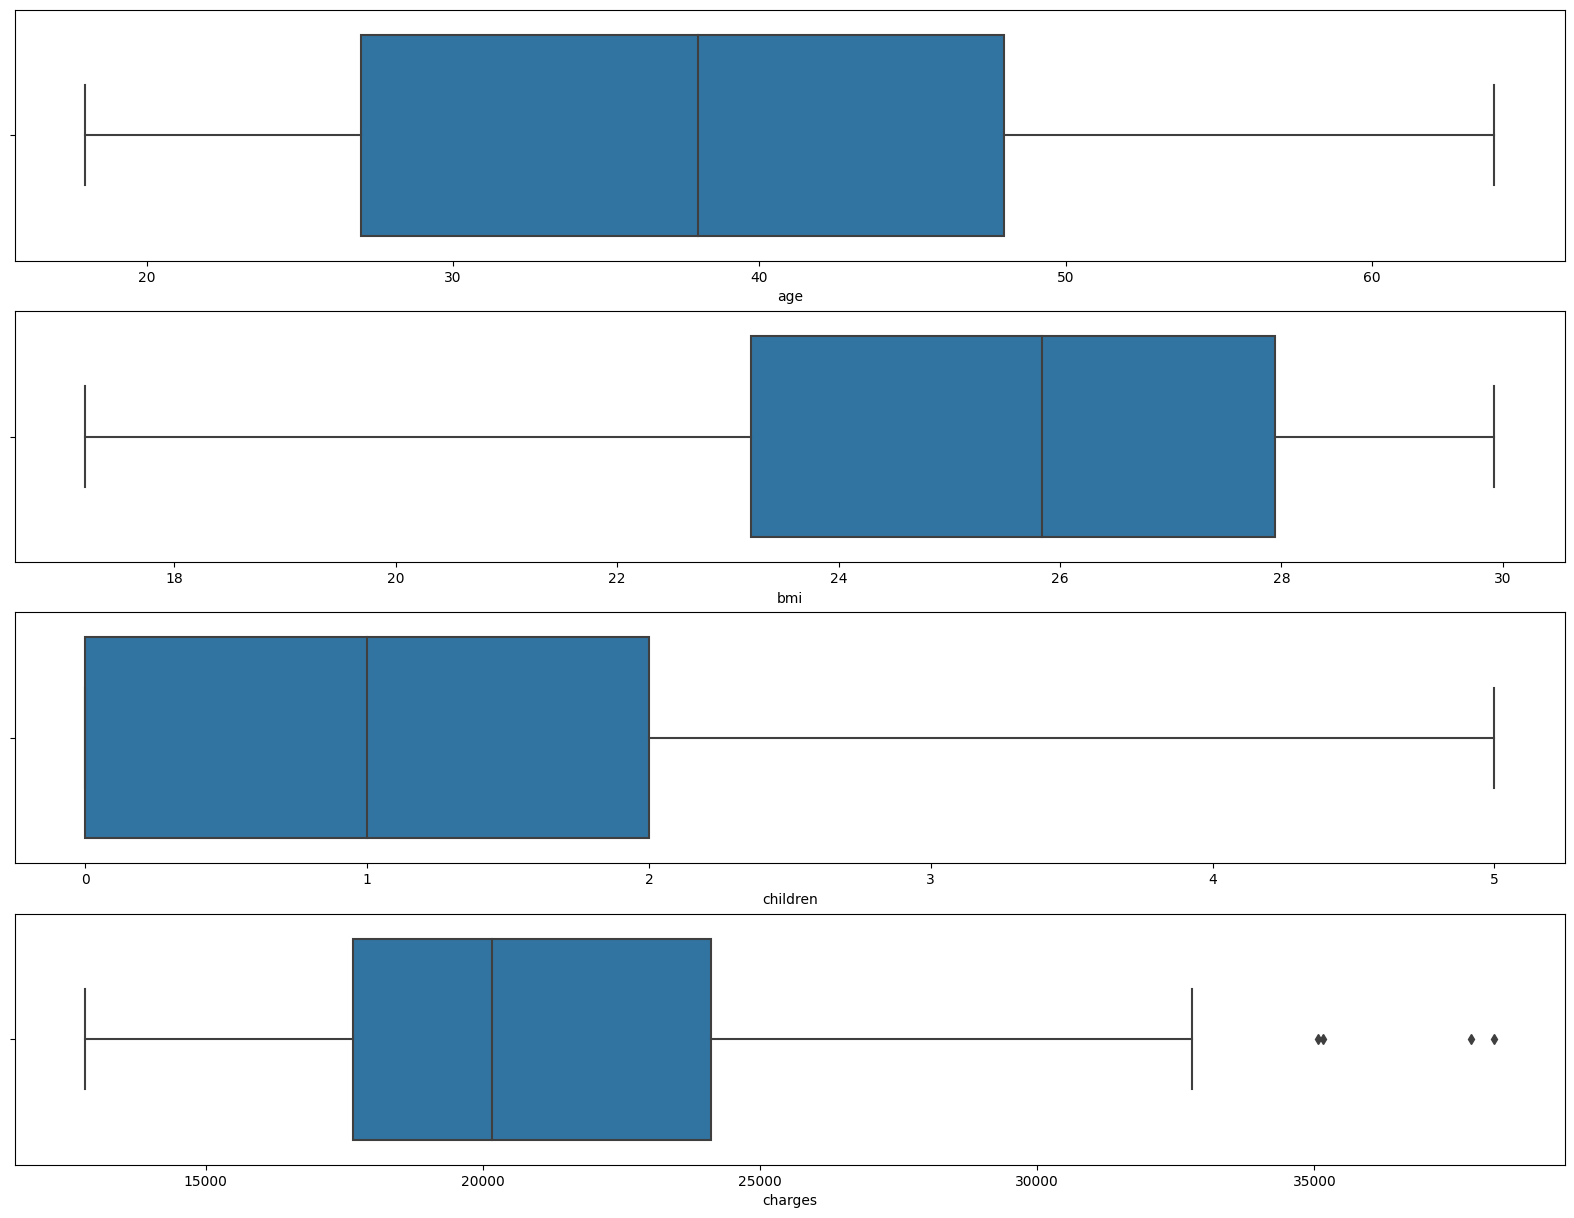

In [19]:
#Boxplot de los fumadores con bmi bajo.

df_insurance_smoker_low_numericas = df_insurance_smoker_low.select_dtypes(include=np.number)
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_insurance_smoker_low_numericas.columns)):
    sns.boxplot(x=df_insurance_smoker_low_numericas.columns[i], data=df_insurance_smoker_low_numericas, ax=ax[i])
plt.show()

In [20]:
df_insurance_smoker_high = df_insurance_smoker_high.reset_index().drop("index",axis=1)

In [21]:
Q1_non_smoker = np.nanpercentile(df_insurance_non_smoker["bmi"], 25)
Q1_non_smoker_charges = np.nanpercentile(df_insurance_non_smoker["charges"], 25)

Q1_smoker_high = np.nanpercentile(df_insurance_smoker_high["bmi"], 25)
Q1_smoker_high_charges = np.nanpercentile(df_insurance_smoker_high["charges"], 25)

Q1_non_smoker_charges

3986.4386999999997

In [22]:
Q3_non_smoker = np.nanpercentile(df_insurance_non_smoker["bmi"], 75)
Q3_non_smoker_charges = np.nanpercentile(df_insurance_non_smoker["charges"], 75)

Q3_smoker_high = np.nanpercentile(df_insurance_smoker_high["bmi"], 75)
Q3_smoker_high_charges = np.nanpercentile(df_insurance_smoker_high["charges"], 75)
Q3_non_smoker_charges

11362.88705

In [23]:
IQR_non_smoker = Q3_non_smoker - Q1_non_smoker
IQR_non_smoker_charges = Q3_non_smoker_charges - Q1_non_smoker_charges

IQR_smoker_high = Q3_smoker_high - Q1_smoker_high
IQR_smoker_high_charges = Q3_smoker_high_charges - Q1_smoker_high_charges

IQR_non_smoker_charges

7376.44835

In [24]:
outlier_step_non_smoker = 1.5 * IQR_non_smoker
outlier_step_non_smoker_charges = 1.5 * IQR_non_smoker_charges

outlier_step_smoker_high = 1.5 * IQR_smoker_high
outlier_step_smoker_high_charges = 1.5 * IQR_smoker_high_charges

outlier_step_non_smoker_charges

11064.672525

In [25]:
#Me voy a quedar con estos outliers, no parece que tengan nada raro.
outliers_data_non_smoker = df_insurance_non_smoker[(df_insurance_non_smoker["bmi"] < Q1_non_smoker - outlier_step_non_smoker) | (df_insurance_non_smoker["bmi"] > Q3_non_smoker + outlier_step_non_smoker)]

outliers_data_smoker_high = df_insurance_smoker_high[(df_insurance_smoker_high["bmi"] < Q1_smoker_high - outlier_step_smoker_high) | (df_insurance_smoker_high["bmi"] > Q3_smoker_high + outlier_step_smoker_high)]

outliers_data_smoker_high

,age,sex,bmi,children,smoker,region,charges
36,25,male,45.54,2,yes,southeast,42112.23560
57,54,female,47.41,0,yes,southeast,63770.42801
58,43,female,46.20,0,yes,southeast,45863.20500
93,37,female,47.60,2,yes,southwest,46113.51100
110,22,male,52.58,1,yes,southeast,44501.39820
127,19,male,44.88,0,yes,southeast,39722.74620


In [26]:
x = list(outliers_data_smoker_high.index)
x 

[36, 57, 58, 93, 110, 127]

In [27]:
df_insurance_smoker_high.shape

(145, 7)

In [28]:
#Eliminamos los outliers ya que no son muchos y me estaban estropeando las metricas en los pasos finales.

In [29]:
df_insurance_smoker_high = df_insurance_smoker_high.drop(df_insurance_smoker_high.index[list(x)])
df_insurance_smoker_high.shape

(139, 7)

In [30]:
# Estos outliers se deben a cargos muy bajos o muy altos, son normales por lo que los voy a mantener.
outliers_data_non_smoker_charges = df_insurance_non_smoker[(df_insurance_non_smoker["charges"] < Q1_non_smoker - outlier_step_non_smoker) | (df_insurance_non_smoker["charges"] > Q3_non_smoker + outlier_step_non_smoker)]
outliers_data_non_smoker_charges

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


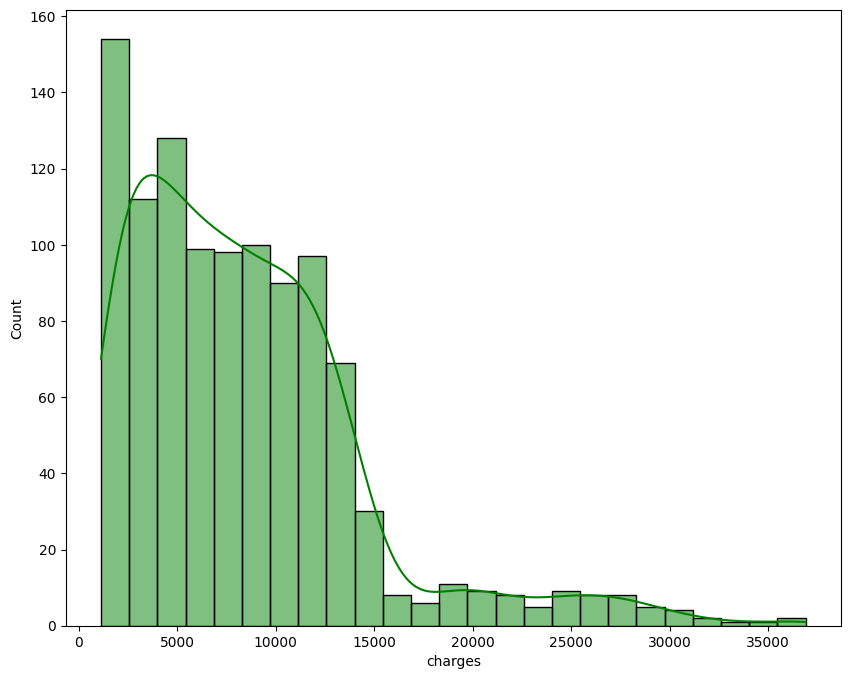

In [31]:
#Normalizar.

sns.histplot(df_insurance_non_smoker["charges"], 
             kde = True, 
             color = "green");

In [32]:
df_insurance_non_smoker['charges_norm'] = boxcox(df_insurance_non_smoker['charges'])[0]
stats.shapiro(df_insurance_non_smoker["charges_norm"])

ShapiroResult(statistic=0.9838202595710754, pvalue=1.7410106689652594e-09)

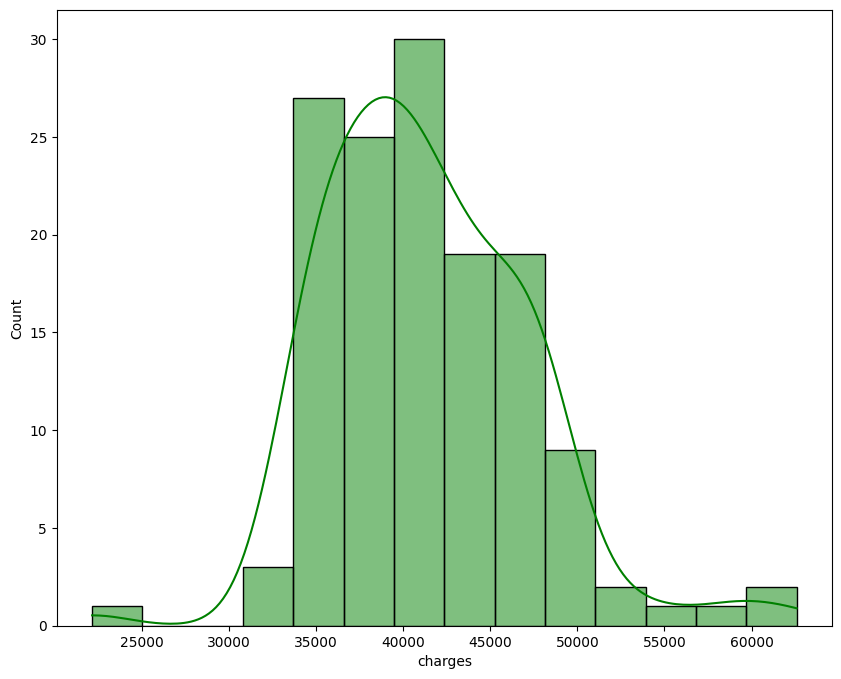

In [33]:
sns.histplot(df_insurance_smoker_high["charges"], 
             kde = True, 
             color = "green");

In [34]:
df_insurance_smoker_high['charges_norm'] = boxcox(df_insurance_smoker_high['charges'])[0]
stats.shapiro(df_insurance_smoker_high["charges_norm"])

ShapiroResult(statistic=0.9633000493049622, pvalue=0.000871581316459924)

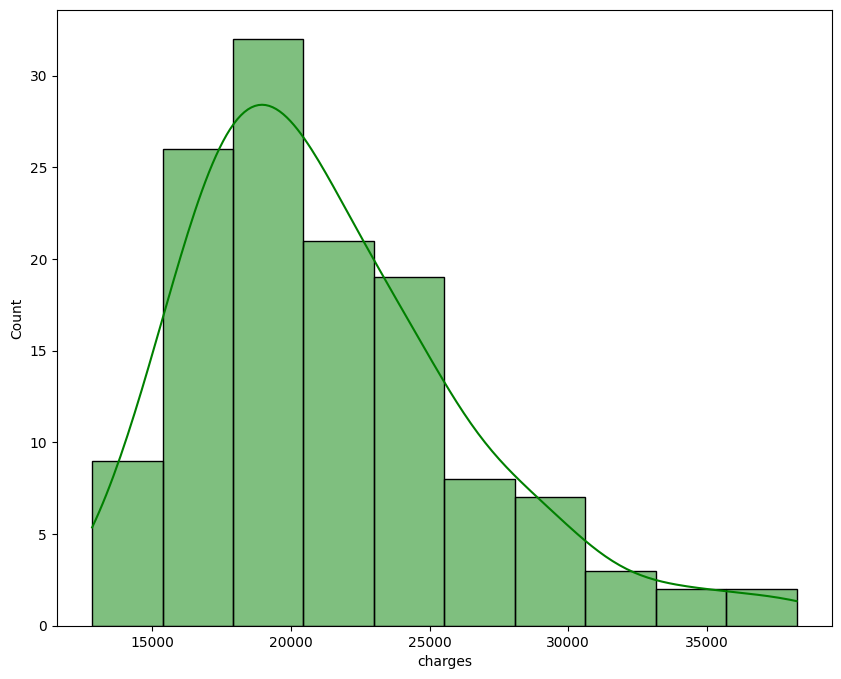

In [35]:
sns.histplot(df_insurance_smoker_low["charges"], 
             kde = True, 
             color = "green");

In [36]:
#Esta es el unico df que voy a poder normalizar ya que tiene mas de un 0.005 en shapiro test. 

df_insurance_smoker_low['charges_norm'] = boxcox(df_insurance_smoker_low['charges'])[0]
stats.shapiro(df_insurance_smoker_low["charges_norm"])

ShapiroResult(statistic=0.99565190076828, pvalue=0.9657602906227112)

In [37]:
df_insurance_smoker_high = df_insurance_smoker_high.drop("charges_norm",axis=1)
df_insurance_non_smoker = df_insurance_non_smoker.drop("charges_norm",axis=1)

In [38]:
df_insurance_non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [39]:
#Vamos ahora a estandarizar.
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()

In [40]:
df_insurance_non_smoker.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [41]:
insurance_col_non_smoker = df_insurance_non_smoker.columns.drop("sex").drop("smoker").drop("region")
insurance_col_smoker_high = df_insurance_smoker_high.columns.drop("sex").drop("smoker").drop("region")
insurance_col_smoker_low = df_insurance_smoker_low.columns.drop("sex").drop("smoker").drop("region")


In [42]:
insurance_col_smoker_low

Index(['age', 'bmi', 'children', 'charges', 'charges_norm'], dtype='object')

In [43]:
scaler1.fit(df_insurance_non_smoker[insurance_col_non_smoker])
scaler2.fit(df_insurance_smoker_high[insurance_col_smoker_high])
scaler3.fit(df_insurance_smoker_low[insurance_col_smoker_low])

StandardScaler()

In [44]:
x_scaled_non_smoker = scaler1.transform(df_insurance_non_smoker[insurance_col_non_smoker])

In [45]:
x_scaled_smoker_high = scaler2.transform(df_insurance_smoker_high[insurance_col_smoker_high])

In [46]:
x_scaled_smoker_low = scaler3.transform(df_insurance_smoker_low[insurance_col_smoker_low])


In [47]:
df_insurance_non_smoker_standard = df_insurance_non_smoker.copy()
df_insurance_smoker_high_standard = df_insurance_smoker_high.copy()
df_insurance_smoker_low_standard = df_insurance_smoker_low.copy()

In [48]:
df_insurance_non_smoker_standard[insurance_col_non_smoker] = x_scaled_non_smoker
df_insurance_smoker_high_standard[insurance_col_smoker_high] = x_scaled_smoker_high
df_insurance_smoker_low_standard[insurance_col_smoker_low] = x_scaled_smoker_low

df_insurance_smoker_low_standard = df_insurance_smoker_low_standard.drop("charges",axis=1)
df_insurance_smoker_high_standard = df_insurance_smoker_high_standard
df_insurance_non_smoker_standard = df_insurance_non_smoker_standard

In [49]:
df_insurance_smoker_high_standard

,age,sex,bmi,children,smoker,region,charges
0,-0.866383,male,2.092823,-0.992001,yes,southeast,-0.294643
1,-0.656335,male,0.089603,-0.992001,yes,southwest,-0.772466
2,-0.376272,female,-0.901741,-0.096623,yes,northeast,-0.623586
3,-0.586319,male,0.382901,0.798754,yes,southwest,-0.449782
4,-1.216462,male,0.177592,-0.992001,yes,southwest,-0.988083
...,...,...,...,...,...,...,...
140,0.393902,male,-1.359285,-0.992001,yes,southeast,3.663456
141,1.584170,male,-1.208237,1.694132,yes,northwest,0.929312
142,-1.006414,female,-1.406212,-0.992001,yes,southwest,-1.278281
143,-1.426509,female,-0.086375,0.798754,yes,southwest,-0.848230


In [50]:
df_insurance_smoker_high = df_insurance_smoker_high.reset_index().drop("index",axis = 1)
df_insurance_smoker_high_standard = df_insurance_smoker_high_standard.reset_index().drop("index",axis = 1)
df_insurance_smoker_low = df_insurance_smoker_low.reset_index().drop("index",axis = 1)
df_insurance_smoker_low_standard = df_insurance_smoker_low_standard.reset_index().drop("index",axis = 1)

In [51]:
df_insurance_non_smoker = df_insurance_non_smoker.reset_index().drop("index",axis = 1)
df_insurance_non_smoker_standard = df_insurance_non_smoker_standard.reset_index().drop("index",axis=1)

In [52]:
df_insurance_non_smoker_standard

,age,sex,bmi,children,smoker,region,charges
0,-1.519191,male,0.516236,-0.074103,no,southeast,-1.119806
1,-0.808802,male,0.388758,1.568521,no,southeast,-0.665136
2,-0.453608,male,-1.315636,-0.895416,no,northwest,2.261773
3,-0.524646,male,-0.293330,-0.895416,no,northwest,-0.762384
4,-0.595685,female,-0.813175,-0.895416,no,southeast,-0.780784
...,...,...,...,...,...,...,...
1059,0.896132,female,2.325757,1.568521,no,southwest,0.496985
1060,0.754054,male,0.052681,1.568521,no,northwest,0.361591
1061,-1.519191,female,0.209958,-0.895416,no,northeast,-1.039613
1062,-1.519191,female,1.026147,-0.895416,no,southeast,-1.135783


In [53]:
# Ahora procederemos al encoding.

oh = OneHotEncoder()
transformados = oh.fit_transform(df_insurance_non_smoker[["region"]])

oh_df = pd.DataFrame(transformados.toarray(), dtype = int)
oh_df.head()

,0,1,2,3
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [54]:
oh_df.columns = oh.get_feature_names_out()
oh_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
1059,0,0,0,1
1060,0,1,0,0
1061,1,0,0,0
1062,0,0,1,0


In [55]:
df_insurance_non_smoker_standard[oh_df.columns] = oh_df
df_insurance_non_smoker_standard

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.519191,male,0.516236,-0.074103,no,southeast,-1.119806,0,0,1,0
1,-0.808802,male,0.388758,1.568521,no,southeast,-0.665136,0,0,1,0
2,-0.453608,male,-1.315636,-0.895416,no,northwest,2.261773,0,1,0,0
3,-0.524646,male,-0.293330,-0.895416,no,northwest,-0.762384,0,1,0,0
4,-0.595685,female,-0.813175,-0.895416,no,southeast,-0.780784,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1059,0.896132,female,2.325757,1.568521,no,southwest,0.496985,0,0,0,1
1060,0.754054,male,0.052681,1.568521,no,northwest,0.361591,0,1,0,0
1061,-1.519191,female,0.209958,-0.895416,no,northeast,-1.039613,1,0,0,0
1062,-1.519191,female,1.026147,-0.895416,no,southeast,-1.135783,0,0,1,0


In [56]:
def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff

In [57]:
df_insurance_smoker_high_standard = one_hot_encoder(df_insurance_smoker_high_standard, ["sex", "smoker","region"])
df_insurance_smoker_high_standard

,age,bmi,children,charges,sex_female,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-0.866383,2.092823,-0.992001,-0.294643,0,1,1,0,0,1,0
1,-0.656335,0.089603,-0.992001,-0.772466,0,1,1,0,0,0,1
2,-0.376272,-0.901741,-0.096623,-0.623586,1,0,1,1,0,0,0
3,-0.586319,0.382901,0.798754,-0.449782,0,1,1,0,0,0,1
4,-1.216462,0.177592,-0.992001,-0.988083,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
134,0.393902,-1.359285,-0.992001,3.663456,0,1,1,0,0,1,0
135,1.584170,-1.208237,1.694132,0.929312,0,1,1,0,1,0,0
136,-1.006414,-1.406212,-0.992001,-1.278281,1,0,1,0,0,0,1
137,-1.426509,-0.086375,0.798754,-0.848230,1,0,1,0,0,0,1


In [58]:
df_insurance_smoker_low_standard = one_hot_encoder(df_insurance_smoker_low_standard, ["sex", "smoker","region"])
df_insurance_smoker_low_standard

,age,bmi,children,charges_norm,sex_female,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.400866,0.822245,-0.940625,-0.953700,1,0,1,0,0,0,1
1,1.798229,0.310077,-0.940625,1.271876,1,0,1,0,0,1,0
2,0.756664,0.854056,-0.109525,0.624891,0,1,1,0,0,0,1
3,1.128651,-0.774700,-0.109525,0.567086,1,0,1,0,0,1,0
4,-1.326468,-0.921033,-0.940625,-1.731658,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
124,-0.656890,-1.102360,-0.940625,-1.208081,1,0,1,1,0,0,0
125,-0.433697,0.892230,2.383775,0.223403,0,1,1,0,1,0,0
126,-0.582492,-0.528160,1.552675,-0.409954,1,0,1,0,1,0,0
127,1.798229,0.438914,-0.940625,1.310143,0,1,1,1,0,0,0


In [59]:
df_insurance_non_smoker_standard = one_hot_encoder(df_insurance_non_smoker_standard, ["sex", "smoker"])

In [60]:
df_insurance_non_smoker_standard = df_insurance_non_smoker_standard.drop("region", axis = 1).drop("smoker_no", axis = 1)
df_insurance_smoker_high_standard = df_insurance_smoker_high_standard.drop("smoker_yes", axis = 1)
df_insurance_smoker_low_standard = df_insurance_smoker_low_standard.drop("smoker_yes", axis = 1)
df_insurance_non_smoker_standard

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,-1.519191,0.516236,-0.074103,-1.119806,0,0,1,0,0,1
1,-0.808802,0.388758,1.568521,-0.665136,0,0,1,0,0,1
2,-0.453608,-1.315636,-0.895416,2.261773,0,1,0,0,0,1
3,-0.524646,-0.293330,-0.895416,-0.762384,0,1,0,0,0,1
4,-0.595685,-0.813175,-0.895416,-0.780784,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1059,0.896132,2.325757,1.568521,0.496985,0,0,0,1,1,0
1060,0.754054,0.052681,1.568521,0.361591,0,1,0,0,0,1
1061,-1.519191,0.209958,-0.895416,-1.039613,1,0,0,0,1,0
1062,-1.519191,1.026147,-0.895416,-1.135783,0,0,1,0,1,0


In [61]:
#Voy ahora a construir el train-test para el modelo.

#Este es el modelo predictivo de no fumadores.
X = df_insurance_non_smoker_standard.drop("charges", axis = 1)
y = df_insurance_non_smoker_standard["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8,random_state = 42)

#Este es el modelo predictivo de fumadores con bmi alto.

X_fum_high = df_insurance_smoker_high_standard.drop("charges", axis = 1)
y_fum_high = df_insurance_smoker_high_standard["charges"]

X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_fum_high,y_fum_high, train_size = 0.8,random_state = 42)

#Este es el modelo predictivo de fumadores con bmi bajo.

X_fum_low = df_insurance_smoker_low_standard.drop("charges_norm", axis = 1)
y_fum_low = df_insurance_smoker_low_standard["charges_norm"]

X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_fum_low,y_fum_low, train_size = 0.8,random_state = 42)

In [62]:
print("Datos de entrenamiento")
print("-----------------------")
print(X_train.describe())

Datos de entrenamiento
-----------------------
              age         bmi    children  region_northeast  region_northwest  \
count  851.000000  851.000000  851.000000        851.000000        851.000000   
mean     0.007436    0.004903   -0.008476          0.242068          0.249119   
std      0.996497    0.996165    0.997805          0.428587          0.432757   
min     -1.519191   -2.432307   -0.895416          0.000000          0.000000   
25%     -0.879841   -0.717980   -0.895416          0.000000          0.000000   
50%      0.043665   -0.041686   -0.074103          0.000000          0.000000   
75%      0.860612    0.620536    0.747209          0.000000          0.000000   
max      1.748599    3.721390    3.211146          1.000000          1.000000   

       region_southeast  region_southwest  sex_female    sex_male  
count        851.000000        851.000000  851.000000  851.000000  
mean           0.259694          0.249119    0.520564    0.479436  
std            0.43

In [63]:
df_insurance_non_smoker_standard

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,-1.519191,0.516236,-0.074103,-1.119806,0,0,1,0,0,1
1,-0.808802,0.388758,1.568521,-0.665136,0,0,1,0,0,1
2,-0.453608,-1.315636,-0.895416,2.261773,0,1,0,0,0,1
3,-0.524646,-0.293330,-0.895416,-0.762384,0,1,0,0,0,1
4,-0.595685,-0.813175,-0.895416,-0.780784,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1059,0.896132,2.325757,1.568521,0.496985,0,0,0,1,1,0
1060,0.754054,0.052681,1.568521,0.361591,0,1,0,0,0,1
1061,-1.519191,0.209958,-0.895416,-1.039613,1,0,0,0,1,0
1062,-1.519191,1.026147,-0.895416,-1.135783,0,0,1,0,1,0


In [64]:
df_insurance_smoker_high_standard

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,-0.866383,2.092823,-0.992001,-0.294643,0,1,0,0,1,0
1,-0.656335,0.089603,-0.992001,-0.772466,0,1,0,0,0,1
2,-0.376272,-0.901741,-0.096623,-0.623586,1,0,1,0,0,0
3,-0.586319,0.382901,0.798754,-0.449782,0,1,0,0,0,1
4,-1.216462,0.177592,-0.992001,-0.988083,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
134,0.393902,-1.359285,-0.992001,3.663456,0,1,0,0,1,0
135,1.584170,-1.208237,1.694132,0.929312,0,1,0,1,0,0
136,-1.006414,-1.406212,-0.992001,-1.278281,1,0,0,0,0,1
137,-1.426509,-0.086375,0.798754,-0.848230,1,0,0,0,0,1


In [65]:
df_insurance_smoker_low_standard

,age,bmi,children,charges_norm,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.400866,0.822245,-0.940625,-0.953700,1,0,0,0,0,1
1,1.798229,0.310077,-0.940625,1.271876,1,0,0,0,1,0
2,0.756664,0.854056,-0.109525,0.624891,0,1,0,0,0,1
3,1.128651,-0.774700,-0.109525,0.567086,1,0,0,0,1,0
4,-1.326468,-0.921033,-0.940625,-1.731658,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
124,-0.656890,-1.102360,-0.940625,-1.208081,1,0,1,0,0,0
125,-0.433697,0.892230,2.383775,0.223403,0,1,0,1,0,0
126,-0.582492,-0.528160,1.552675,-0.409954,1,0,0,1,0,0
127,1.798229,0.438914,-0.940625,1.310143,0,1,1,0,0,0


In [66]:
#Primero voy a realizar la regresión lineal con la grafica de smoker_low

In [67]:
regressor_non_smoker = DecisionTreeRegressor(random_state=0)
regressor_non_smoker.fit(X_train,y_train)

regressor_smoker_high = DecisionTreeRegressor(random_state=0)
regressor_smoker_high.fit(X_train_high,y_train_high)

regressor_smoker_low = DecisionTreeRegressor(random_state=0)
regressor_smoker_low.fit(X_train_low,y_train_low)

DecisionTreeRegressor(random_state=0)

In [68]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df


In [69]:
lr_smoker_low = LinearRegression()
lr_smoker_low.fit(X_train_low,y_train_low)

LinearRegression()

In [70]:
lr_smoker_low.intercept_

0.02568191905503797

In [71]:
lr_smoker_low.coef_

array([ 7.33224914e-01,  2.98883307e-01,  8.90079667e-02, -7.75590777e-03,
        7.75590777e-03, -6.34144245e-03,  6.04243110e-02,  1.33674047e-04,
       -5.42165426e-02])

In [72]:
y_pred_test = lr_smoker_low.predict(X_test_low)
y_pred_train = lr_smoker_low.predict(X_train_low)

In [73]:
train_df = pd.DataFrame({'Real': y_train_low, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train_low)})
test_df  = pd.DataFrame({'Real': y_test_low,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test_low)})
results = pd.concat([train_df,test_df], axis = 0)
results.head()

,Real,Predicted,Set
70,0.787203,0.835097,Train
78,-1.312159,-0.802405,Train
47,1.407249,1.632808,Train
0,-0.953700,-0.901408,Train
12,-0.746670,-0.630846,Train


In [74]:
results['residual'] = results['Real'] - results['Predicted']
results.head()

,Real,Predicted,Set,residual
70,0.787203,0.835097,Train,-0.047894
78,-1.312159,-0.802405,Train,-0.509754
47,1.407249,1.632808,Train,-0.225559
0,-0.953700,-0.901408,Train,-0.052292
12,-0.746670,-0.630846,Train,-0.115825


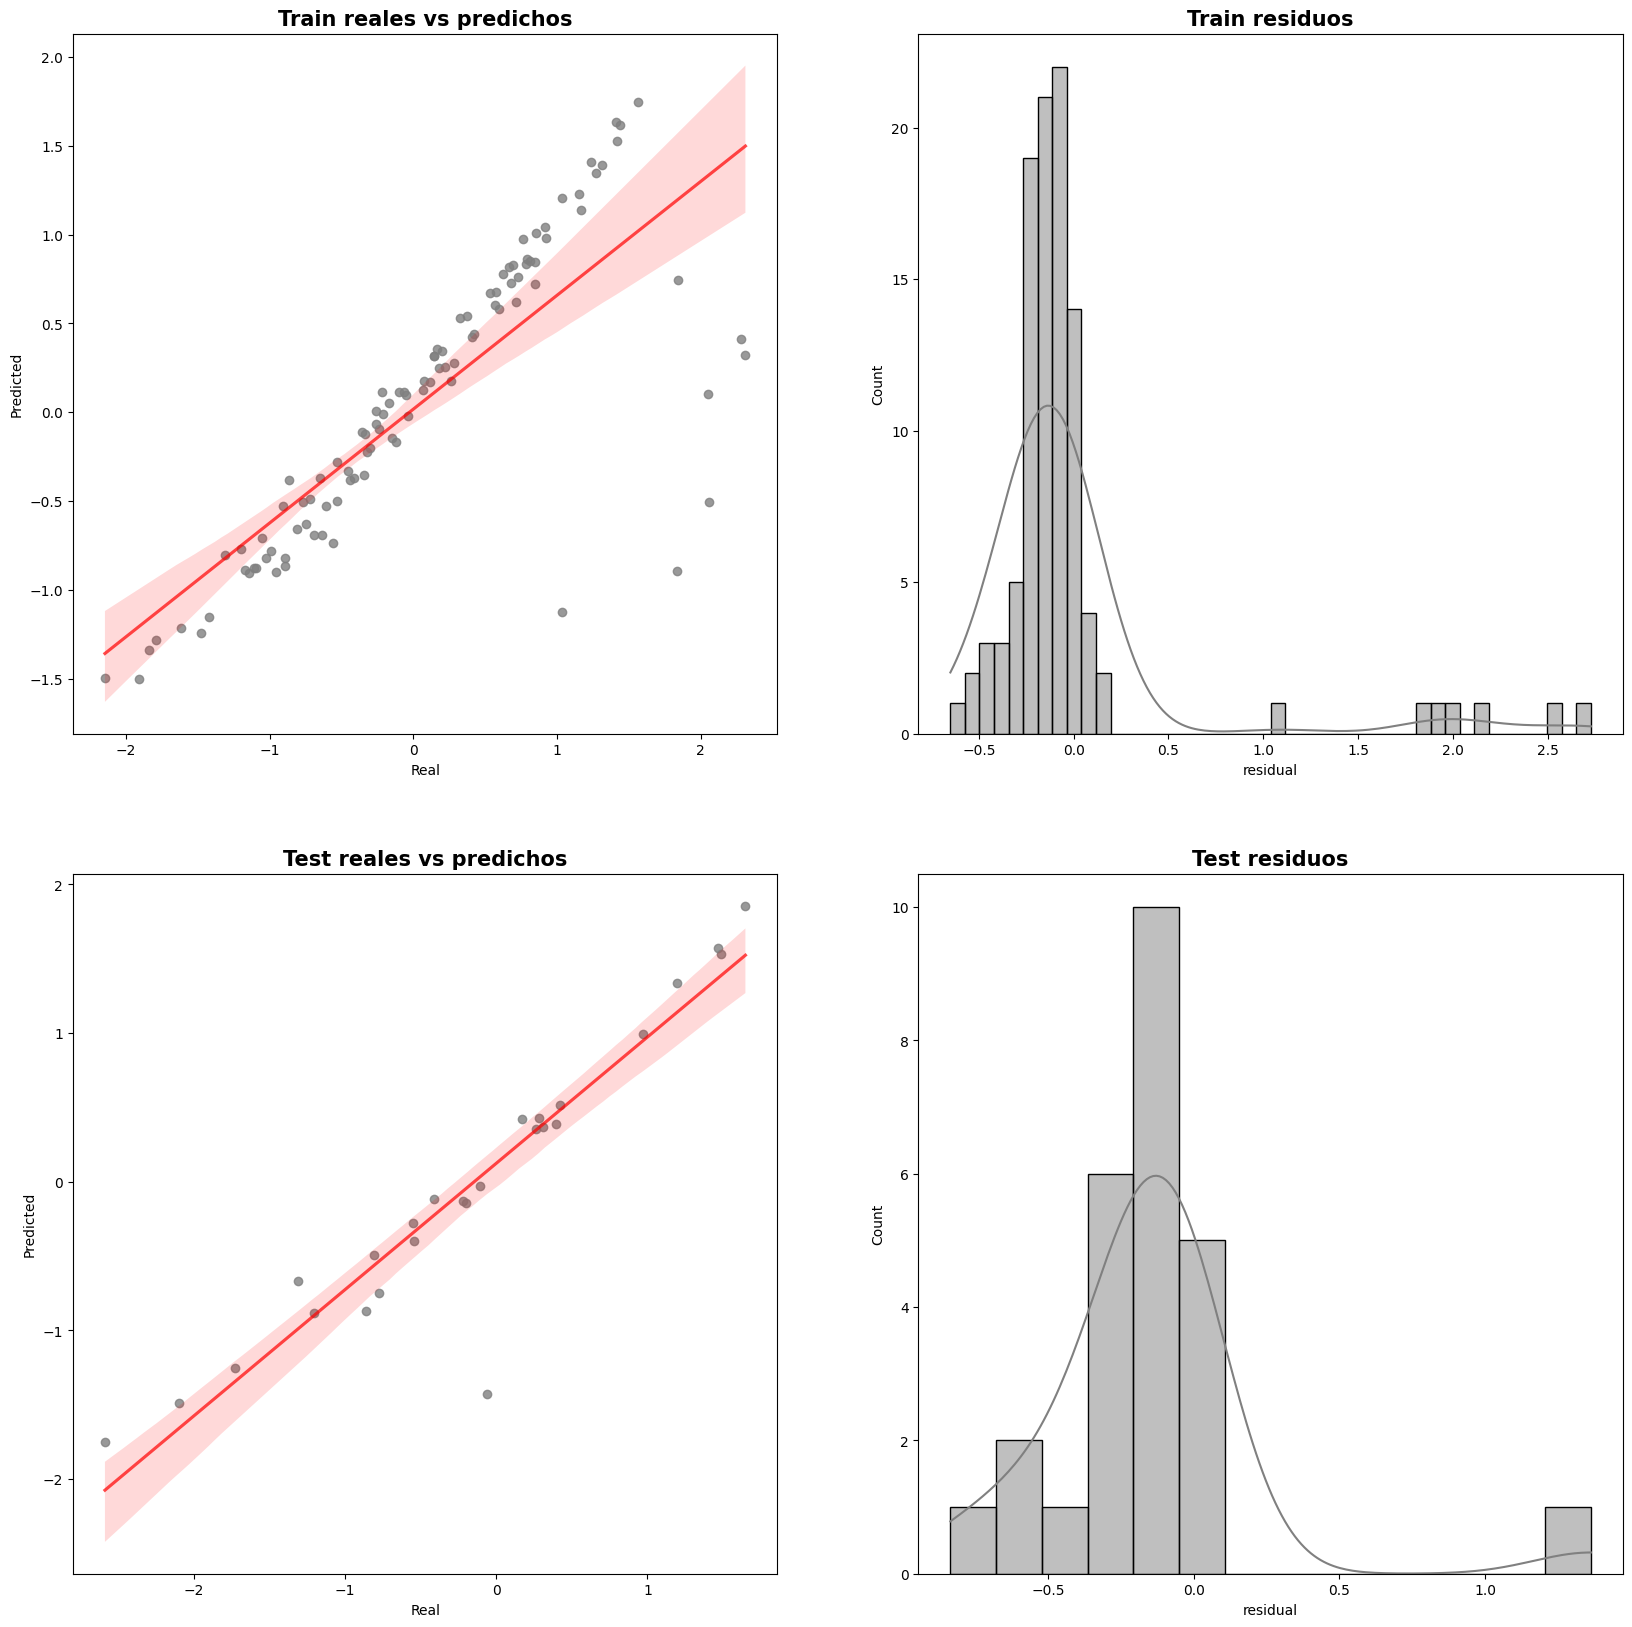

In [75]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = results[results['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = results[results['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(results[results['Set'] == "Train"],
             x="residual",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(results[results['Set'] == "Test"],
             x="residual",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [76]:
lr_results = metricas(y_test_low, y_train_low, y_pred_test, y_pred_train, "Regresion lineal smoker low bmi")
lr_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.258798,0.160216,0.400270,0.857788,test,Regresion lineal smoker low bmi
1,0.291478,0.343113,0.585758,0.641446,train,Regresion lineal smoker low bmi


In [77]:
#Segundo voy a hacer el decision tree para los tres.

In [78]:
param = {"max_depth": [4,5,6,7,8,9,10,11,12],
        "min_samples_split": [10,15,20,25,30,35,40,45,50,100,200],
        "max_features": [1,2,3,4,5,6,7,8,9]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [79]:
gs.fit(X_train,y_train)
best_tree_non_smoker = gs.best_estimator_
best_tree_non_smoker

Fitting 10 folds for each of 891 candidates, totalling 8910 fits


DecisionTreeRegressor(max_depth=4, max_features=7, min_samples_split=45)

In [80]:

gs.fit(X_train_high,y_train_high)
best_tree_smoker_high = gs.best_estimator_
best_tree_smoker_high

Fitting 10 folds for each of 891 candidates, totalling 8910 fits


DecisionTreeRegressor(max_depth=5, max_features=6, min_samples_split=30)

In [81]:

gs.fit(X_train_low,y_train_low)
best_tree_smoker_low = gs.best_estimator_
best_tree_smoker_low

Fitting 10 folds for each of 891 candidates, totalling 8910 fits


DecisionTreeRegressor(max_depth=12, max_features=8, min_samples_split=30)

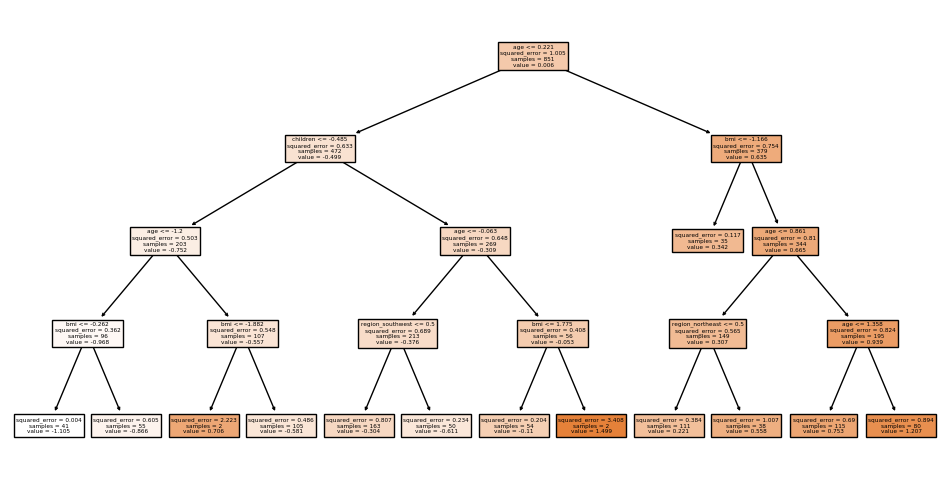

In [82]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree_non_smoker, feature_names=X_train.columns, filled=True);

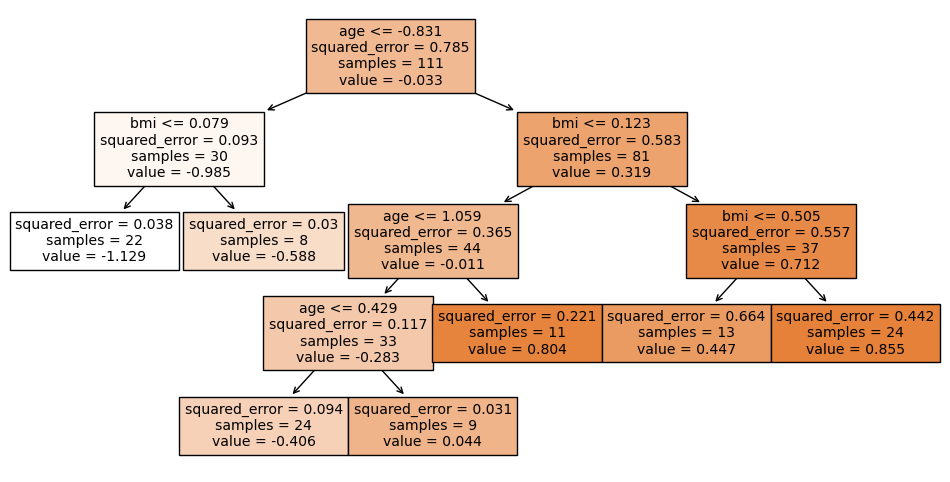

In [83]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree_smoker_high, feature_names=X_train_high.columns, filled=True);

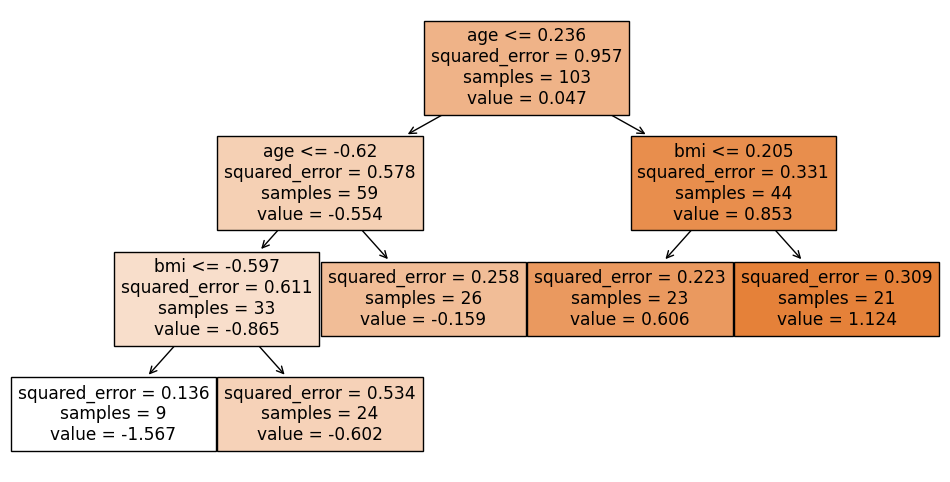

In [84]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree_smoker_low, feature_names=X_train_low.columns, filled=True);

In [85]:
y_pred_test_dt = best_tree_non_smoker.predict(X_test)
y_pred_train_dt = best_tree_non_smoker.predict(X_train)

In [86]:
df_results_non_smoker = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision tree non smoker")
df_results_non_smoker

,MAE,MSE,RMSE,R2,set,modelo
0,0.443111,0.572735,0.756793,0.414488,test,Decision tree non smoker
1,0.435631,0.570791,0.755507,0.432205,train,Decision tree non smoker


In [87]:
y_pred_test_dt_smoker_high = best_tree_smoker_high.predict(X_test_high)
y_pred_train_dt_smoker_high = best_tree_smoker_high.predict(X_train_high)

In [88]:
df_results_smoker_high = metricas(y_test_high, y_train_high, y_pred_test_dt_smoker_high, y_pred_train_dt_smoker_high, "Decision tree smoker high bmi")
df_results_smoker_high

,MAE,MSE,RMSE,R2,set,modelo
0,0.693332,1.476337,1.215046,0.192681,test,Decision tree smoker high bmi
1,0.327106,0.227571,0.477044,0.710253,train,Decision tree smoker high bmi


In [89]:
y_pred_test_dt_smoker_low = best_tree_smoker_low.predict(X_test_low)
y_pred_train_dt_smoker_low = best_tree_smoker_low.predict(X_train_low)

In [90]:
df_results_smoker_low = metricas(y_test_low, y_train_low, y_pred_test_dt_smoker_low, y_pred_train_dt_smoker_low, "Decision tree smoker low bmi")
df_results_smoker_low

,MAE,MSE,RMSE,R2,set,modelo
0,0.521644,0.397992,0.630866,0.646731,test,Decision tree smoker low bmi
1,0.387191,0.314260,0.560589,0.671597,train,Decision tree smoker low bmi


In [91]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': regressor_non_smoker.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.492949
1,bmi,0.311933
2,children,0.102404
3,region_northeast,0.015479
4,region_northwest,0.006050
5,region_southeast,0.024191
6,region_southwest,0.005342
7,sex_female,0.029961
8,sex_male,0.011690


In [92]:
genero = pd.DataFrame(importancia_predictores.iloc[7:9])
estado = pd.DataFrame(importancia_predictores.loc[3:6 ])

importancia_predictores.drop(genero.index, inplace = True)
importancia_predictores.drop(estado.index, inplace = True)

importancia_predictores.loc[4] =  ["state", estado["importancia"].sum()]
importancia_predictores.loc[3] =  ["gender", genero["importancia"].sum()]
importancia_predictores.sort_values( ascending=False, by= "importancia", inplace=True)

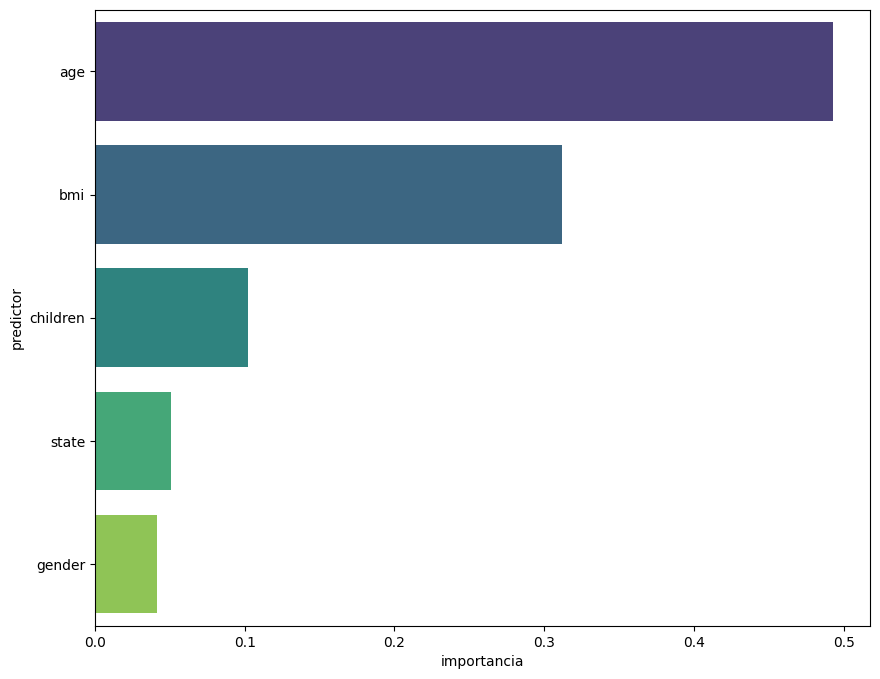

In [93]:
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");

In [94]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': regressor_smoker_high.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.659503
1,bmi,0.189053
2,children,0.079511
3,region_northeast,0.000092
4,region_northwest,0.008571
5,region_southeast,0.001414
6,region_southwest,0.002131
7,sex_female,0.058619
8,sex_male,0.001107


In [95]:
genero = pd.DataFrame(importancia_predictores.iloc[7:9])
estado = pd.DataFrame(importancia_predictores.loc[3:6 ])

importancia_predictores.drop(genero.index, inplace = True)
importancia_predictores.drop(estado.index, inplace = True)

importancia_predictores.loc[4] =  ["state", estado["importancia"].sum()]
importancia_predictores.loc[3] =  ["gender", genero["importancia"].sum()]
importancia_predictores.sort_values( ascending=False, by= "importancia", inplace=True)


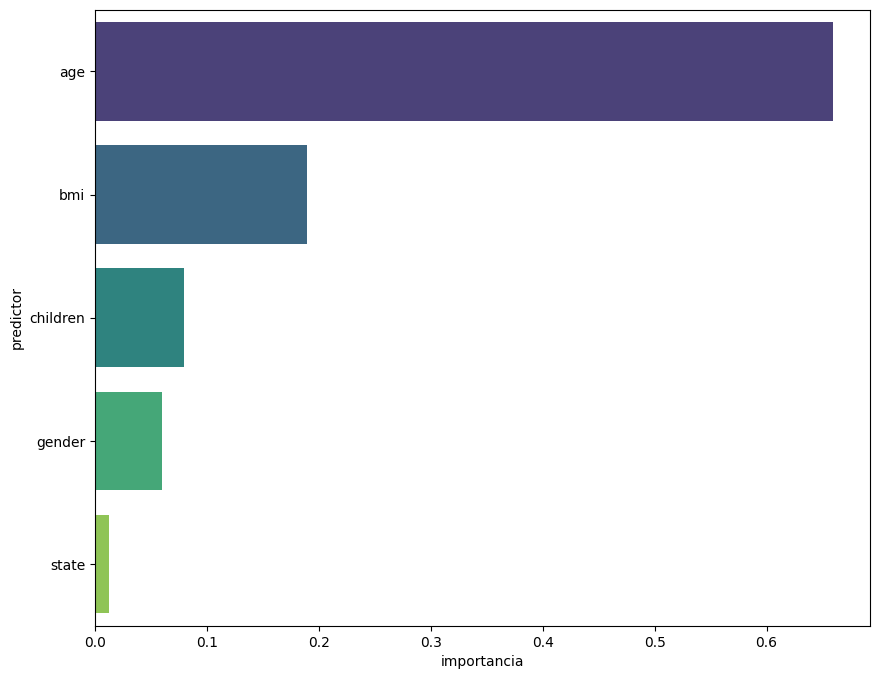

In [96]:
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");

In [97]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': regressor_smoker_low.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.649300
1,bmi,0.263708
2,children,0.009704
3,region_northeast,0.001898
4,region_northwest,0.028953
5,region_southeast,0.024544
6,region_southwest,0.000382
7,sex_female,0.020002
8,sex_male,0.001508


In [98]:
genero = pd.DataFrame(importancia_predictores.iloc[7:9])
estado = pd.DataFrame(importancia_predictores.loc[3:6 ])

importancia_predictores.drop(genero.index, inplace = True)
importancia_predictores.drop(estado.index, inplace = True)

importancia_predictores.loc[4] =  ["state", estado["importancia"].sum()]
importancia_predictores.loc[3] =  ["gender", genero["importancia"].sum()]
importancia_predictores.sort_values( ascending=False, by= "importancia", inplace=True)

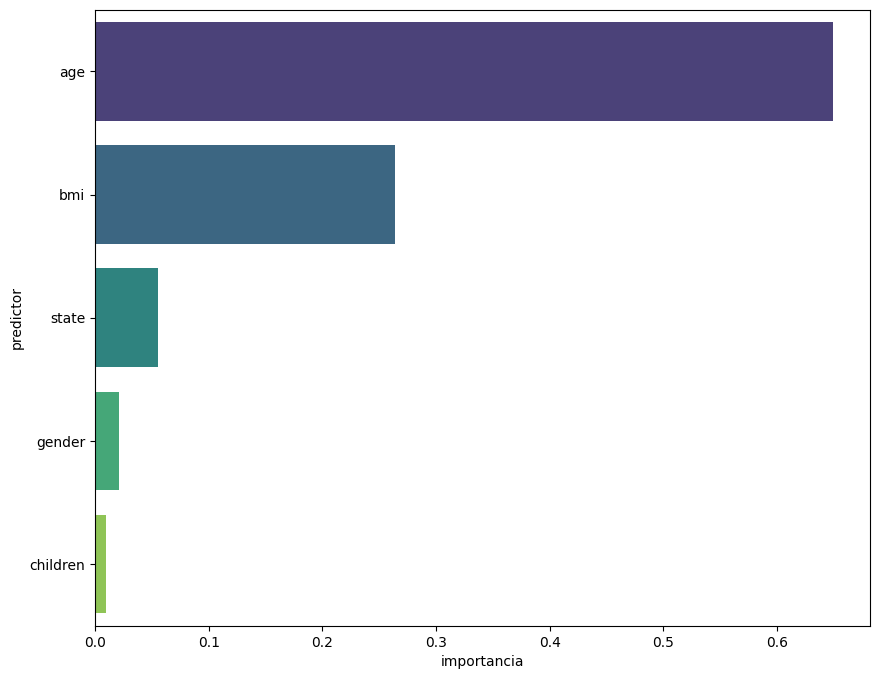

In [99]:
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");

In [100]:
#Por ultimo voy a hacer el random forest para los tres.

In [101]:
param = {"max_depth": [7,8,9,10,],
        "min_samples_split": [10,15,20,25,30,35,40,45,50],
        "max_features": [6,7,8,9]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [102]:
bosque.fit(X_train, y_train)
bos_non_smoker = bosque.best_estimator_
bos_non_smoker

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


RandomForestRegressor(max_depth=7, max_features=6, min_samples_split=50)

In [103]:
y_pred_test_rf = bos_non_smoker.predict(X_test)
y_pred_train_rf = bos_non_smoker.predict(X_train)

rf_results_non = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest non smoker")
rf_results_non

,MAE,MSE,RMSE,R2,set,modelo
0,0.407913,0.530516,0.728365,0.457649,test,Random Forest non smoker
1,0.392050,0.511280,0.715039,0.491403,train,Random Forest non smoker


In [104]:
bosque.fit(X_train_high, y_train_high)
bos_smoker_high = bosque.best_estimator_
bos_smoker_high

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


RandomForestRegressor(max_depth=7, max_features=6, min_samples_split=15)

In [105]:
y_pred_test_rf_high = bos_smoker_high.predict(X_test_high)
y_pred_train_rf_high = bos_smoker_high.predict(X_train_high)

rf_results_high = metricas(y_test_high, y_train_high, y_pred_test_rf_high, y_pred_train_rf_high, "Random Forest smoker high bmi")
rf_results_high

,MAE,MSE,RMSE,R2,set,modelo
0,0.608272,1.234300,1.110990,0.325036,test,Random Forest smoker high bmi
1,0.223542,0.153426,0.391697,0.804655,train,Random Forest smoker high bmi


In [106]:
bosque.fit(X_train_low, y_train_low)
bos_smoker_low = bosque.best_estimator_
bos_smoker_low

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


RandomForestRegressor(max_depth=9, max_features=6, min_samples_split=10)

In [107]:
y_pred_test_rf_low = bos_smoker_low.predict(X_test_low)
y_pred_train_rf_low = bos_smoker_low.predict(X_train_low)

rf_results_low = metricas(y_test_low, y_train_low, y_pred_test_rf_low, y_pred_train_rf_low, "Random Forest smoker low bmi")
rf_results_low

,MAE,MSE,RMSE,R2,set,modelo
0,0.431320,0.327475,0.572255,0.709324,test,Random Forest smoker low bmi
1,0.268131,0.186248,0.431565,0.805370,train,Random Forest smoker low bmi


In [108]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos_non_smoker.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.824578
1,bmi,0.065381
2,children,0.077530
3,region_northeast,0.016515
4,region_northwest,0.003847
5,region_southeast,0.002711
6,region_southwest,0.005029
7,sex_female,0.001801
8,sex_male,0.002607


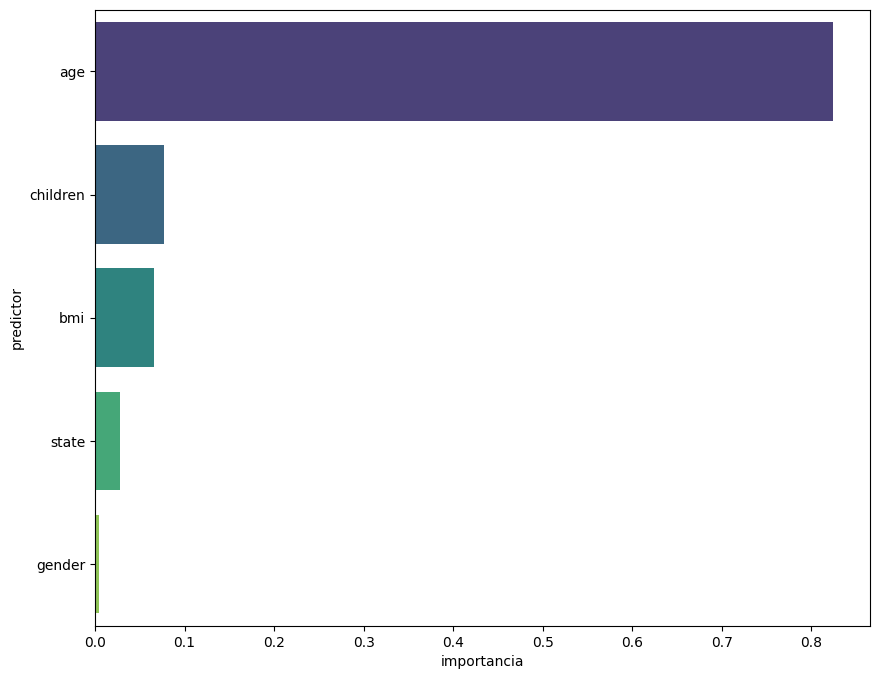

In [109]:
genero = pd.DataFrame(importancia_predictores_rf.iloc[7:9])
estado = pd.DataFrame(importancia_predictores_rf.loc[3:6 ])

importancia_predictores_rf.drop(genero.index, inplace = True)
importancia_predictores_rf.drop(estado.index, inplace = True)

importancia_predictores_rf.loc[4] =  ["state", estado["importancia"].sum()]
importancia_predictores_rf.loc[3] =  ["gender", genero["importancia"].sum()]
importancia_predictores_rf.sort_values( ascending=False, by= "importancia", inplace=True)

sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_rf, palette="viridis");

In [110]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos_smoker_high.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.734215
1,bmi,0.215945
2,children,0.020072
3,region_northeast,0.002526
4,region_northwest,0.001893
5,region_southeast,0.004227
6,region_southwest,0.007532
7,sex_female,0.005381
8,sex_male,0.008208


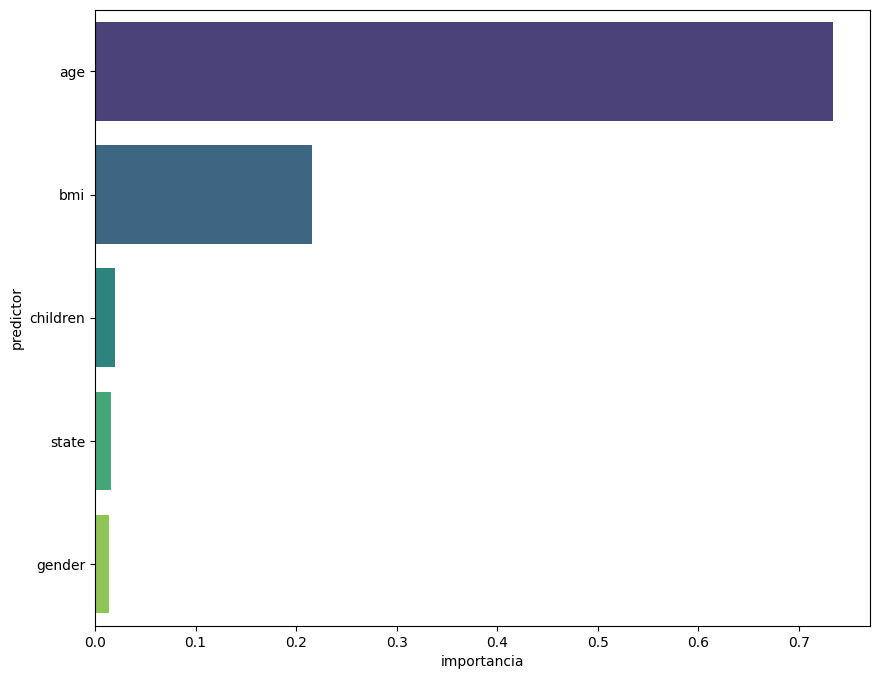

In [111]:
genero = pd.DataFrame(importancia_predictores_rf.iloc[7:9])
estado = pd.DataFrame(importancia_predictores_rf.loc[3:6 ])

importancia_predictores_rf.drop(genero.index, inplace = True)
importancia_predictores_rf.drop(estado.index, inplace = True)

importancia_predictores_rf.loc[4] =  ["state", estado["importancia"].sum()]
importancia_predictores_rf.loc[3] =  ["gender", genero["importancia"].sum()]
importancia_predictores_rf.sort_values( ascending=False, by= "importancia", inplace=True)

sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_rf, palette="viridis");

In [112]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos_smoker_low.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.701609
1,bmi,0.222258
2,children,0.021381
3,region_northeast,0.004348
4,region_northwest,0.003882
5,region_southeast,0.024530
6,region_southwest,0.013506
7,sex_female,0.004115
8,sex_male,0.004371


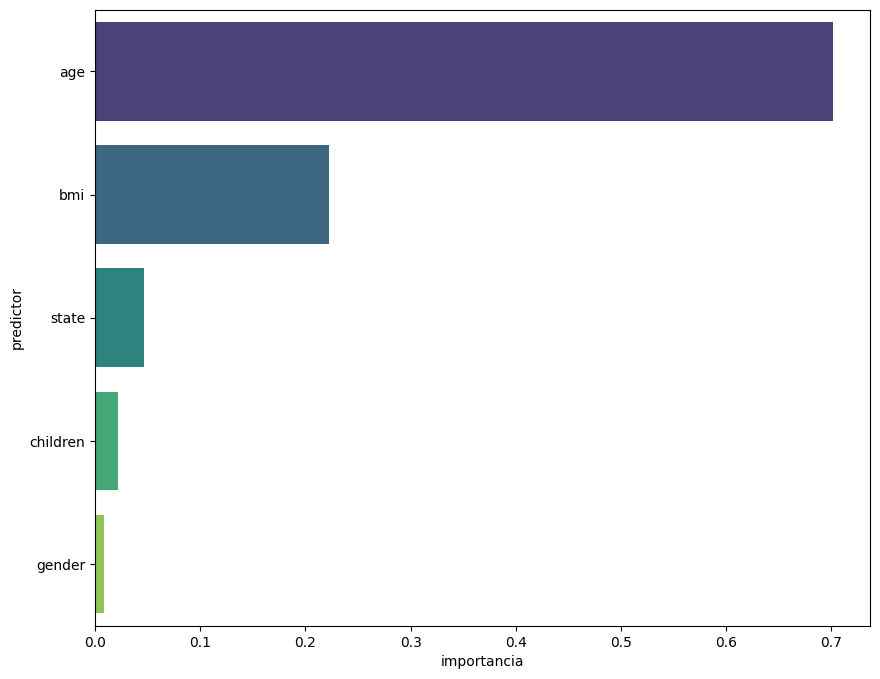

In [113]:
genero = pd.DataFrame(importancia_predictores_rf.iloc[7:9])
estado = pd.DataFrame(importancia_predictores_rf.loc[3:6 ])

importancia_predictores_rf.drop(genero.index, inplace = True)
importancia_predictores_rf.drop(estado.index, inplace = True)

importancia_predictores_rf.loc[4] =  ["state", estado["importancia"].sum()]
importancia_predictores_rf.loc[3] =  ["gender", genero["importancia"].sum()]
importancia_predictores_rf.sort_values( ascending=False, by= "importancia", inplace=True)

sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_rf, palette="viridis");

In [114]:
df_all = pd.concat([df_results_non_smoker,df_results_smoker_high,df_results_smoker_low,rf_results_non,rf_results_low,rf_results_high,lr_results])
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.443111,0.572735,0.756793,0.414488,test,Decision tree non smoker
1,0.435631,0.570791,0.755507,0.432205,train,Decision tree non smoker
0,0.693332,1.476337,1.215046,0.192681,test,Decision tree smoker high bmi
1,0.327106,0.227571,0.477044,0.710253,train,Decision tree smoker high bmi
0,0.521644,0.397992,0.630866,0.646731,test,Decision tree smoker low bmi
1,0.387191,0.314260,0.560589,0.671597,train,Decision tree smoker low bmi
0,0.407913,0.530516,0.728365,0.457649,test,Random Forest non smoker
1,0.392050,0.511280,0.715039,0.491403,train,Random Forest non smoker
0,0.431320,0.327475,0.572255,0.709324,test,Random Forest smoker low bmi
1,0.268131,0.186248,0.431565,0.805370,train,Random Forest smoker low bmi


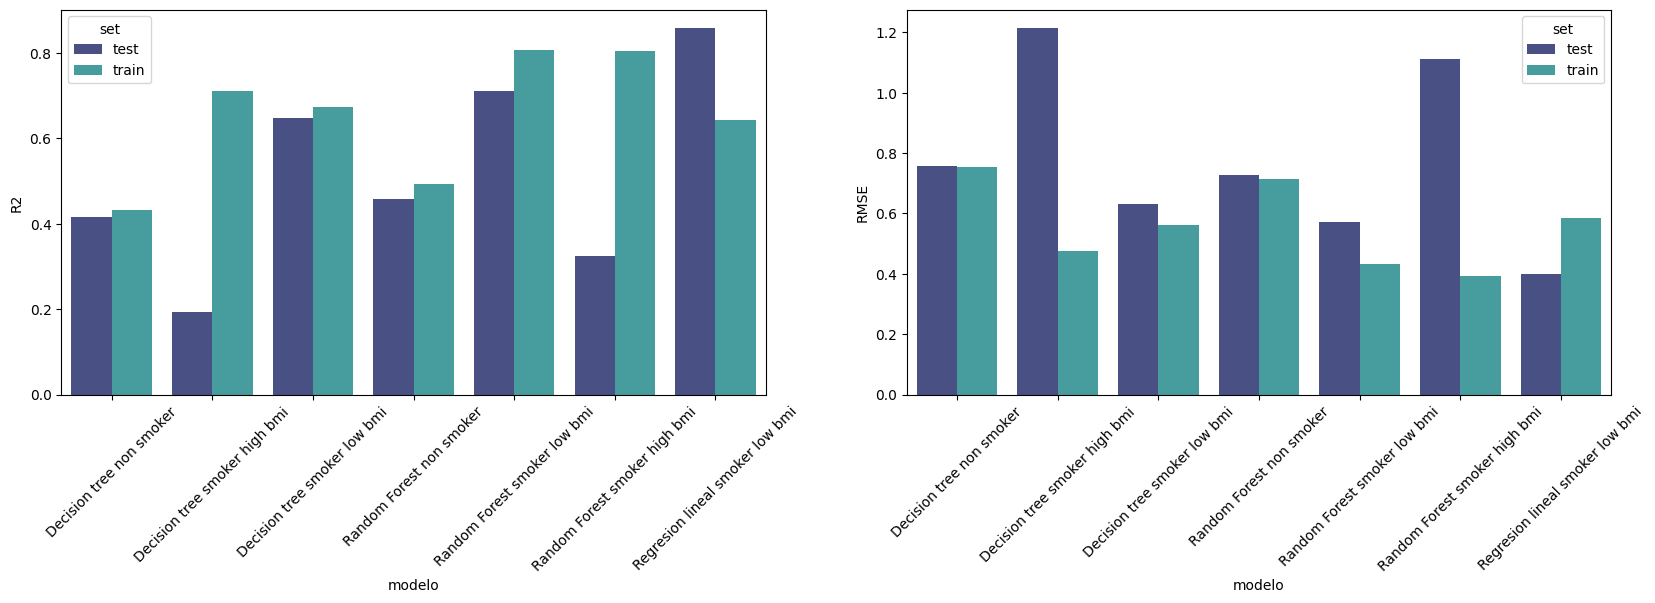

In [115]:
fig, axes = plt.subplots(1,2, figsize =(20,5))

chart1 = sns.barplot(data = df_all, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
chart2 = sns.barplot(data = df_all, x = "modelo", y = "RMSE", hue = "set",ax = axes[1], palette = "mako")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45);

In [116]:
#En general me ha predicho muy mal el smoker_high que es fumador de bmi alto, puede ser que necesite mas datos o que haya algo que se me haya escapado,
#Las predicciones de no fumador me funcionan bastante bien.
#Las predicciones de fumador con bmi bajo me funcionan a veces bien y a veces regular, necesito ajustar un poco mas.